In [223]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [224]:
#Read in the csv file and convert to a Pandas dataframe
Happyness_2015 = pd.read_csv("Data/2015.csv")
Happyness_2016 = pd.read_csv("Data/2016.csv")
Happyness_2017 = pd.read_csv("Data/2017.csv")
Happyness_2018 = pd.read_csv("Data/2018.csv")
Happyness_2019 = pd.read_csv("Data/2019.csv")


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [225]:
Happyness_2015.shape

(158, 12)

In [226]:
Happyness_2016.shape

(157, 13)

In [227]:
Happyness_2017.shape

(155, 12)

In [228]:
Happyness_2018.shape

(156, 9)

In [229]:
Happyness_2019.shape

(156, 9)

In [230]:
Happyness_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [231]:
Happyness_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [232]:
Happyness_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [233]:
Happyness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [234]:
Happyness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [235]:
Happyness_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [236]:
Happyness_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [237]:
Happyness_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [238]:
Happyness_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [239]:
Happyness_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [240]:
Happyness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [241]:
Happyness_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [242]:
Happyness_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [243]:
Happyness_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [244]:
Happyness_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [245]:
Happyness_2015.describe() 

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [246]:
Happyness_2016.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [247]:
Happyness_2017.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [248]:
Happyness_2018.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [249]:
Happyness_2019.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [250]:
# we will see how many region we have, and we have 10.
# we see also that are non dup values on country.
Happyness_2015.describe(include="object") , Happyness_2016.describe(include="object") , Happyness_2017.describe(include="object") , Happyness_2018.describe(include="object") , Happyness_2019.describe(include="object") , 

(            Country              Region
 count           158                 158
 unique          158                  10
 top     Switzerland  Sub-Saharan Africa
 freq              1                  40,
         Country              Region
 count       157                 157
 unique      157                  10
 top     Denmark  Sub-Saharan Africa
 freq          1                  38,
        Country
 count      155
 unique     155
 top     Norway
 freq         1,
        Country or region
 count                156
 unique               156
 top              Finland
 freq                   1,
        Country or region
 count                156
 unique               156
 top              Finland
 freq                   1)

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

## 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [251]:
#this is the source for this data, and its good source"s
"""
World Happiness Report Website:
🔗 https://worldhappiness.report/

Gallup World Poll (Survey Data Source):
🔗 https://www.gallup.com/

United Nations Sustainable Development Solutions Network (UNSDSN):
🔗 https://www.unsdsn.org/
"""


'\nWorld Happiness Report Website:\n🔗 https://worldhappiness.report/\n\nGallup World Poll (Survey Data Source):\n🔗 https://www.gallup.com/\n\nUnited Nations Sustainable Development Solutions Network (UNSDSN):\n🔗 https://www.unsdsn.org/\n'

## 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [252]:
# data is exist from 2015 to 2019, and its what we need to answers our questions.

## 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [253]:
# the values are not the same in all columns, and the ID country names are diffrent in the last two data set from the first three data set.
# like (between 155-158 rows per year)
# i see also that are "country","Region" in 2018,2019 are in same column.
# most of columns have the same types of method to calculate the Happyness.
# there also no missing values, no dup.


## 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [254]:
# i see also that are "country","Region" in 2018,2019 are in same column.
# and on 2017, did not have the column region.
Happyness_2015.describe(include='object') , Happyness_2016.describe(include='object') , Happyness_2017.describe(include='object') , Happyness_2018.describe(include='object') , Happyness_2019.describe(include='object') 

(            Country              Region
 count           158                 158
 unique          158                  10
 top     Switzerland  Sub-Saharan Africa
 freq              1                  40,
         Country              Region
 count       157                 157
 unique      157                  10
 top     Denmark  Sub-Saharan Africa
 freq          1                  38,
        Country
 count      155
 unique     155
 top     Norway
 freq         1,
        Country or region
 count                156
 unique               156
 top              Finland
 freq                   1,
        Country or region
 count                156
 unique               156
 top              Finland
 freq                   1)

## 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [255]:
#there no need to use drop function to delete, because there is no duplicated values on any columns.
Happyness_2015[Happyness_2015.duplicated()].sum() 


Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                  0.0
Standard Error                   0.0
Economy (GDP per Capita)         0.0
Family                           0.0
Health (Life Expectancy)         0.0
Freedom                          0.0
Trust (Government Corruption)    0.0
Generosity                       0.0
Dystopia Residual                0.0
dtype: object

In [256]:
Happyness_2016[Happyness_2016.duplicated()].sum() 

Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                  0.0
Lower Confidence Interval        0.0
Upper Confidence Interval        0.0
Economy (GDP per Capita)         0.0
Family                           0.0
Health (Life Expectancy)         0.0
Freedom                          0.0
Trust (Government Corruption)    0.0
Generosity                       0.0
Dystopia Residual                0.0
dtype: object

In [257]:
Happyness_2017[Happyness_2017.duplicated()].sum() 

Country                            0
Happiness.Rank                     0
Happiness.Score                  0.0
Whisker.high                     0.0
Whisker.low                      0.0
Economy..GDP.per.Capita.         0.0
Family                           0.0
Health..Life.Expectancy.         0.0
Freedom                          0.0
Generosity                       0.0
Trust..Government.Corruption.    0.0
Dystopia.Residual                0.0
dtype: object

In [258]:
Happyness_2018[Happyness_2018.duplicated()].sum() 


Overall rank                      0
Country or region                 0
Score                           0.0
GDP per capita                  0.0
Social support                  0.0
Healthy life expectancy         0.0
Freedom to make life choices    0.0
Generosity                      0.0
Perceptions of corruption       0.0
dtype: object

In [259]:
Happyness_2019[Happyness_2019.duplicated()].sum()

Overall rank                      0
Country or region                 0
Score                           0.0
GDP per capita                  0.0
Social support                  0.0
Healthy life expectancy         0.0
Freedom to make life choices    0.0
Generosity                      0.0
Perceptions of corruption       0.0
dtype: object

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [260]:
#Display number missing values per column
Happyness_2015.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [261]:
Happyness_2016.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [262]:
Happyness_2017.isna().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [263]:
Happyness_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [264]:
Happyness_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [265]:
# check columns types 
# we don't need to change any thing, because all the columns we want are already float, and the string columns are all object.
Happyness_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [266]:
Happyness_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [267]:
Happyness_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [268]:
Happyness_2018.dtypes 

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [269]:
Happyness_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [270]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [271]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [272]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [273]:
## Delete unrelevent columns 
#data (2015-2019), this dataset is so good for us
# we will drop the extra columns like, in (2015) Standard Error: because it not a happiness factor.
# we will drop (2016) Lower Confidence Interval, Upper Confidence Interval, because is not a key factor for happiness.
# we will drop (2017) Whisker.high Whisker.low, because represent error margins not happiness.
# after all in the Questions he didn't ask for this columns and for that we will not use it in our data profiling steps. 

Happyness_2015.drop(['Standard Error'] , axis = 1 , inplace = True)
Happyness_2016.drop(['Lower Confidence Interval' , 'Upper Confidence Interval'] , axis = 1 , inplace = True)
Happyness_2017.drop([ 'Whisker.high' , 'Whisker.low' ] , axis = 1 , inplace = True)


In [274]:
# we will rename in (2018) and (2019), some columns like: Freedom to make life choices to Freedom because it look like column Freedom in the first three Data Set.  
# we will change a lot of (2017) columns names, because it have a lot of (.) on columns names.
# same is freedom, we change life social support to family to make look like the first three data set to compare the data between them.
# we do all that to make the data more readible. 


Happyness_2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                               "Economy..GDP.per.Capita.":"Economy (GDP per Capita)",
                               "Happiness.Score":"Happiness Score",
                               "Health..Life.Expectancy.":"Health (Life Expectancy)",
                               "Trust..Government.Corruption.":"Trust (Government Corruption)",
                               "Dystopia.Residual":"Dystopia Residual"}, inplace=True)

Happyness_2018.rename(columns={"Freedom to make life choices": "Freedom",
                               "Social support":"Family",
                               "Perceptions of corruption":"Trust (Government Corruption)",
                               "Overall rank":"Happiness Rank",
                               "Healthy life expectancy": "Health (Life Expectancy)",
                                "Score" : "Happiness Score",
                                "GDP per capita":"Economy (GDP per Capita)",
                                "Healthy life expectancy":"Health (Life Expectancy)"}, inplace=True)

Happyness_2019.rename(columns={"Freedom to make life choices": "Freedom",
                               "Social support":"Family",
                               "Perceptions of corruption":"Trust (Government Corruption)",
                               "Overall rank":"Happiness Rank",
                               "Healthy life expectancy": "Health (Life Expectancy)",
                                "Score" : "Happiness Score",
                                "GDP per capita":"Economy (GDP per Capita)",
                                "Healthy life expectancy":"Health (Life Expectancy)"}, inplace=True)

# # Change the columns of 2018,2019 to make it like 2015,2016,2017

In [275]:
# Change the columns of 2018,2019 to make it like 2015,2016,2017
# Create a map from 2015–2016.
Map = pd.concat([Happyness_2015[["Country", "Region"]], Happyness_2016[["Country", "Region"]]]).drop_duplicates()

# Merge the map with 2017, 2018 and 2019 datasets.
Happyness_2017["Region"] = Happyness_2017["Country"].map(Map.set_index("Country")["Region"])
Happyness_2018["Region"] = Happyness_2018["Country or region"].map(Map.set_index("Country")["Region"])
Happyness_2019["Region"] = Happyness_2019["Country or region"].map(Map.set_index("Country")["Region"])

#first we will see how many region we have now 
Happyness_2018["Region"][Happyness_2018["Region"].duplicated()].value_counts()

Region
Sub-Saharan Africa                 38
Central and Eastern Europe         28
Latin America and Caribbean        20
Western Europe                     19
Middle East and Northern Africa    18
Southeastern Asia                   8
Southern Asia                       6
Eastern Asia                        5
Australia and New Zealand           1
North America                       1
Name: count, dtype: int64

### Correcting errors

-------------------

In [276]:
#after we view it we see that it's indentical to the number of region we already have.
# Check the NaN and replace it 
# go to clean them 
# we will see the Null Value
Happyness_2018[Happyness_2018["Trust (Government Corruption)"].isna()]

,Happiness Rank,Country or region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,Middle East and Northern Africa


In [277]:
#we save the row, and we extract the columns values to calculate the "Trust (Government Corruption)"
null_row = Happyness_2018[Happyness_2018["Trust (Government Corruption)"].isna()]
Sum_row_values = null_row["Economy (GDP per Capita)"].values + null_row["Family"].values + null_row["Health (Life Expectancy)"].values + null_row["Freedom"].values + null_row["Generosity"].values 
Happy_score_value = null_row["Happiness Score"].values
new_trust_value = float(Happy_score_value - Sum_row_values)

#now we have the new Trust Value, and we will raplace the null.
new_trust_value

C:\Users\ish3e\AppData\Local\Temp\ipykernel_16052\3128978823.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_trust_value = float(Happy_score_value - Sum_row_values)


2.7620000000000005

In [278]:
#first of all, why the value it's null? i assume that just they don't have data for it. 
#we will replace the value "NaN" with the (rank - sum of columns = ) of Trust (Government Corruption).
#we will replace the value "NaN" with the new Trust Value.
Happyness_2018["Trust (Government Corruption)"].fillna(new_trust_value, inplace=True)

Happyness_2018.isna().sum()

C:\Users\ish3e\AppData\Local\Temp\ipykernel_16052\3779971241.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Happyness_2018["Trust (Government Corruption)"].fillna(new_trust_value, inplace=True)


Happiness Rank                   0
Country or region                0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Region                           2
dtype: int64

In [279]:
#now we see the value are updated.
Happyness_2018[Happyness_2018["Happiness Rank"] == 20]

,Happiness Rank,Country or region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,2.762,Middle East and Northern Africa


In [280]:
# we already replace the null with the new Trust Value.
# the final thing we need is to calculate the Dystipia residual on 2018,2019, because is missing in the data. 
# so we will find a way to calculate it.
# i found that are the sum of all the columns - happiness score = dystopia resdiual. 
# so this is how to find it and add a column to it.
# we will use (apply) to runs on every rows and make new column and store the data there.

def calculate(x):
    sum = (
        x["Economy (GDP per Capita)"] + 
        x["Family"] + 
        x["Health (Life Expectancy)"] + 
        x["Freedom"] + 
        x["Generosity"] + 
        x["Trust (Government Corruption)"]
    )
    return x["Happiness Score"] - sum

# Apply the calculation to 2018 and 2019 data
Happyness_2018["Dystopia.Residual"] = Happyness_2018.apply(calculate, axis=1)
Happyness_2019["Dystopia.Residual"] = Happyness_2019.apply(calculate, axis=1)

In [281]:
#finally we will rename the column "country or region" and make "Country", in both 2018,2019.
Happyness_2018.rename(columns={"Country or region": "Country"}, inplace=True)
Happyness_2019.rename(columns={"Country or region": "Country"}, inplace=True)
Happyness_2018.columns , Happyness_2019.columns

(Index(['Happiness Rank', 'Country', 'Happiness Score',
        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Region',
        'Dystopia.Residual'],
       dtype='object'),
 Index(['Happiness Rank', 'Country', 'Happiness Score',
        'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
        'Freedom', 'Generosity', 'Trust (Government Corruption)', 'Region',
        'Dystopia.Residual'],
       dtype='object'))

#### checking and dealing with the null values


In [282]:
#Happyness_2016[Happyness_2016["Region"] == "Middle East and Northern Africa" ]

In [283]:
# chick the NaN values again. (2015,2016)
Happyness_2015.isna().sum() , Happyness_2016.isna().sum()

(Country                          0
 Region                           0
 Happiness Rank                   0
 Happiness Score                  0
 Economy (GDP per Capita)         0
 Family                           0
 Health (Life Expectancy)         0
 Freedom                          0
 Trust (Government Corruption)    0
 Generosity                       0
 Dystopia Residual                0
 dtype: int64,
 Country                          0
 Region                           0
 Happiness Rank                   0
 Happiness Score                  0
 Economy (GDP per Capita)         0
 Family                           0
 Health (Life Expectancy)         0
 Freedom                          0
 Trust (Government Corruption)    0
 Generosity                       0
 Dystopia Residual                0
 dtype: int64)

In [284]:
# chick the NaN values again. (2017) 
Happyness_2017.isna().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
Region                           2
dtype: int64

In [285]:
# chick the NaN values again. (2018,2019)
Happyness_2018.isna().sum(),Happyness_2019.isna().sum()

(Happiness Rank                   0
 Country                          0
 Happiness Score                  0
 Economy (GDP per Capita)         0
 Family                           0
 Health (Life Expectancy)         0
 Freedom                          0
 Generosity                       0
 Trust (Government Corruption)    0
 Region                           2
 Dystopia.Residual                0
 dtype: int64,
 Happiness Rank                   0
 Country                          0
 Happiness Score                  0
 Economy (GDP per Capita)         0
 Family                           0
 Health (Life Expectancy)         0
 Freedom                          0
 Generosity                       0
 Trust (Government Corruption)    0
 Region                           4
 Dystopia.Residual                0
 dtype: int64)

#### See the null in Region On (2017,2018,2019)

In [286]:
Happyness_2017[Happyness_2017["Region"].isnull()]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
32,Taiwan Province of China,33,6.422,1.433627,1.384565,0.793984,0.361467,0.258360,0.063829,2.126607,NaN
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,NaN


In [287]:
Happyness_2018[Happyness_2018["Region"].isnull()]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
37,38,Trinidad & Tobago,6.192,1.223,1.492,0.564,0.575,0.171,0.019,NaN,2.148
57,58,Northern Cyprus,5.835,1.229,1.211,0.909,0.495,0.179,0.154,NaN,1.658


In [288]:
Happyness_2019[Happyness_2019["Region"].isnull()]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
38,39,Trinidad & Tobago,6.192,1.231,1.477,0.713,0.489,0.185,0.016,NaN,2.081
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162,NaN,1.391
83,84,North Macedonia,5.274,0.983,1.294,0.838,0.345,0.185,0.034,NaN,1.595
119,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,NaN,2.023


In [289]:
#all the null values are in regions. 
# we will add the right data to it.
Happyness_2017.loc[Happyness_2017["Country"].isin(["Taiwan Province of China", "Hong Kong S.A.R., China"]), "Region"] = "Eastern Asia"

Happyness_2018.loc[Happyness_2018["Country"] == "Trinidad & Tobago", "Region"] = "West Indies"
Happyness_2018.loc[Happyness_2018["Country"] == "Northern Cyprus", "Region"] = "Central and Eastern Europe"

Happyness_2019.loc[Happyness_2019["Country"] == "Trinidad & Tobago", "Region"] = "West Indies"
Happyness_2019.loc[Happyness_2019["Country"] == "Northern Cyprus", "Region"] = "Central and Eastern Europe"
Happyness_2019.loc[Happyness_2019["Country"] == "North Macedonia", "Region"] = "Central and Eastern Europe"
Happyness_2019.loc[Happyness_2019["Country"] == "Gambia", "Region"] = "Sub-Saharan Africa"



#### check tha changes (2017,2018,2019)

In [290]:
Happyness_2017[Happyness_2017["Region"].isnull()]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region


In [291]:
Happyness_2018[Happyness_2018["Region"].isnull()]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual


In [292]:
Happyness_2019[Happyness_2019["Region"].isnull()]

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual


In [293]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [294]:
# we will see if we have outliers in our data after the viualization 

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [295]:
#first we will see the column types.
Happyness_2015.dtypes


Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [296]:
#we will see how many region there in our data.
Happyness_2015.describe(include="object")
#we will visualize the Region because it have only 10 unique var, we will see the distubution of it.

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


In [297]:
Happyness_2015["Region"]

0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                        North America
                    ...               
153                 Sub-Saharan Africa
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
157                 Sub-Saharan Africa
Name: Region, Length: 158, dtype: object

In [298]:
Region_count = Happyness_2015["Region"].value_counts()
Region_count

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

In [299]:
Happyness_2015[Happyness_2015["Region"] == "North America"]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [300]:
Region_count.index

Index(['Sub-Saharan Africa', 'Central and Eastern Europe',
       'Latin America and Caribbean', 'Western Europe',
       'Middle East and Northern Africa', 'Southeastern Asia', 'Southern Asia',
       'Eastern Asia', 'North America', 'Australia and New Zealand'],
      dtype='object', name='Region')

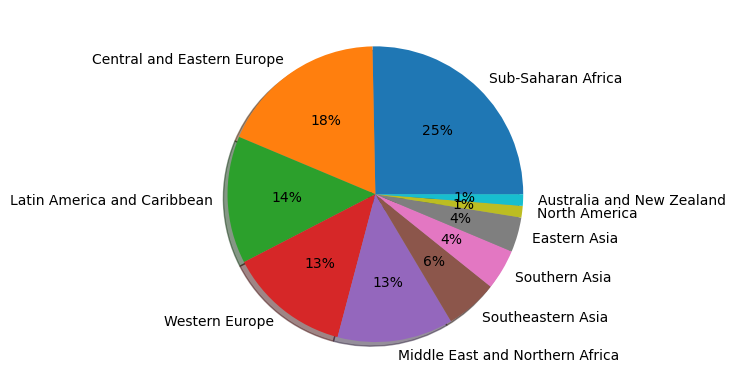

In [301]:
#pie chart for Region that are in our data and the disturbution of it. 
plt.pie(x=Region_count.values,
        labels=Region_count.index,
        autopct='%1.0f%%',
        #startangle=45,
        shadow=True,
        #explode = [0.3,0.2]
       )
plt.show()

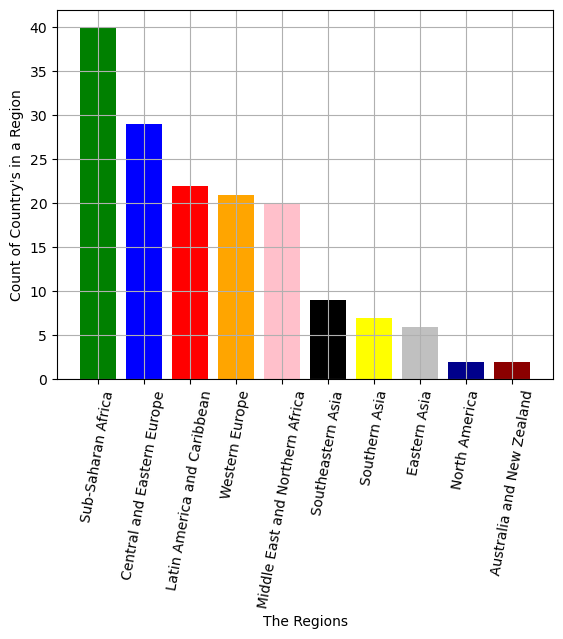

In [302]:
#bar chart
# how many country from a region that what involved in our data. 
plt.bar(
        Region_count.index,
        Region_count.values,
        color=['green', 'blue', 'red', 'orange',"pink","black","yellow","silver","darkblue","darkred"]
       );
plt.ylabel("Count of Country's in a Region")
plt.xlabel("The Regions")
plt.grid()
plt.xticks(rotation=80)# rotate the xlabel
plt.show();

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

## 2015 Visuilize 

### view Happy score


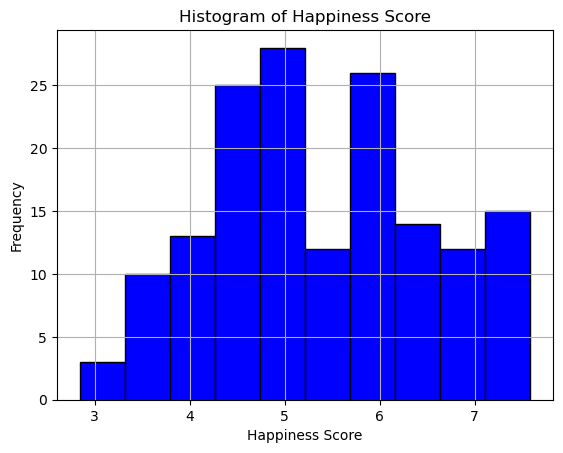

In [303]:
# normal distrubution happy score
hap1 = Happyness_2015[Happyness_2015["Happiness Score"] > 0]
plt.hist(hap1['Happiness Score'],
         facecolor = 'b', edgecolor = 'black',
          bins = 10 #
          #bins = 6 means 6 bars
          )

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()

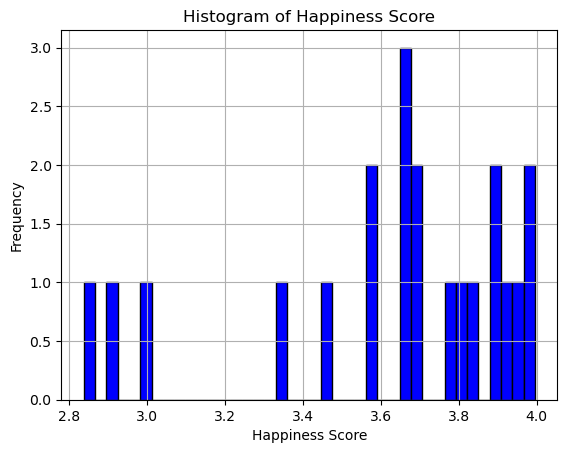

In [304]:
#the disturbution of happy score, we see that there maybe outliers on our data, (0-4)
# wee see it after we make 40 bins 
hap1 = Happyness_2015[Happyness_2015["Happiness Score"] < 4]
plt.hist(hap1['Happiness Score'],
         facecolor = 'b', edgecolor = 'black',
          bins = 40 #
          #bins = 6 means 6 bars
          )

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()

In [305]:
#We check our data, i see nothing wrong with it. 
#low happy score
Happyness_2015.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


### view Economy (GDP per Capita)

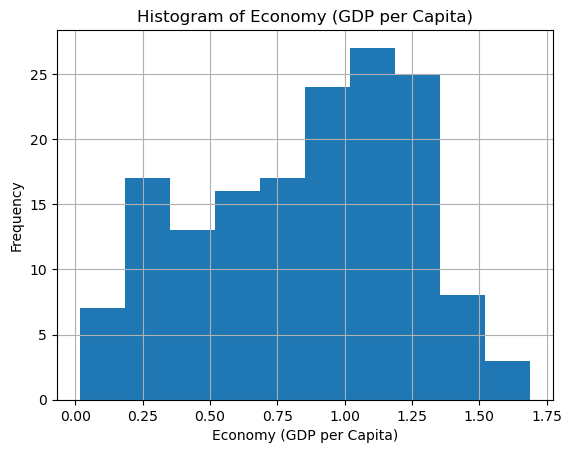

In [306]:
# normal distrubution.
hap1 = Happyness_2015[Happyness_2015["Economy (GDP per Capita)"] > 0]
plt.hist(hap1["Economy (GDP per Capita)"],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 10 #
          )

plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Economy (GDP per Capita)')
plt.show()

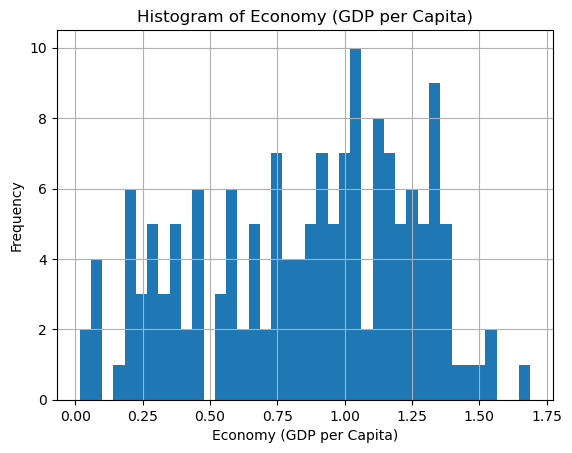

In [307]:
# not a normal distrubution of Economy (GDP per Capita).
hap1 = Happyness_2015[Happyness_2015["Economy (GDP per Capita)"] > 0]
plt.hist(hap1["Economy (GDP per Capita)"],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 40 #
          )

plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Economy (GDP per Capita)')
plt.show()

In [308]:
#see the min outliers
# low Economy (GDP per Capita)
Happyness_2015[Happyness_2015["Economy (GDP per Capita)"] <= 0.25].sort_values(by="Economy (GDP per Capita)", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
139,Comoros,Sub-Saharan Africa,140,3.956,0.23906,0.79273,0.36315,0.22917,0.19900,0.17441,1.95812
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
140,Uganda,Sub-Saharan Africa,141,3.931,0.21102,1.13299,0.33861,0.45727,0.07267,0.29066,1.42766
157,Togo,Sub-Saharan Africa,158,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
146,Madagascar,Sub-Saharan Africa,147,3.681,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
121,Ethiopia,Sub-Saharan Africa,122,4.512,0.19073,0.60406,0.44055,0.43450,0.15048,0.24325,2.44876
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
149,Guinea,Sub-Saharan Africa,150,3.656,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
93,Mozambique,Sub-Saharan Africa,94,4.971,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230


In [309]:
#see the min outliers and the max 
# top Economy (GDP per Capita)
Happyness_2015[Happyness_2015["Economy (GDP per Capita)"] >= 1.5].sort_values(by="Economy (GDP per Capita)", ascending=False)


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
27,Qatar,Middle East and Northern Africa,28,6.611,1.69042,1.07860,0.79733,0.64040,0.52208,0.32573,1.55674
16,Luxembourg,Western Europe,17,6.946,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
38,Kuwait,Middle East and Northern Africa,39,6.295,1.55422,1.16594,0.72492,0.55499,0.25609,0.16228,1.87634
23,Singapore,Southeastern Asia,24,6.798,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501


### view the Family column

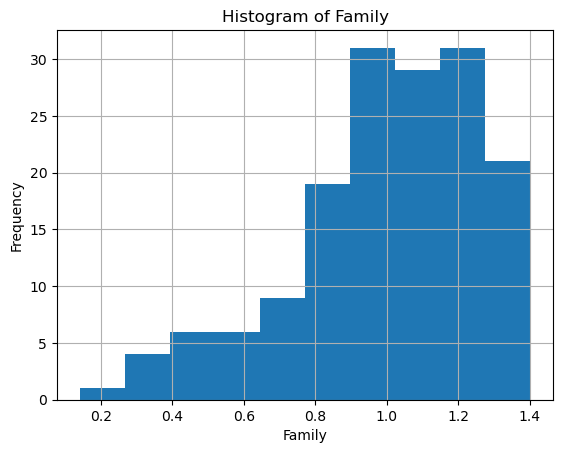

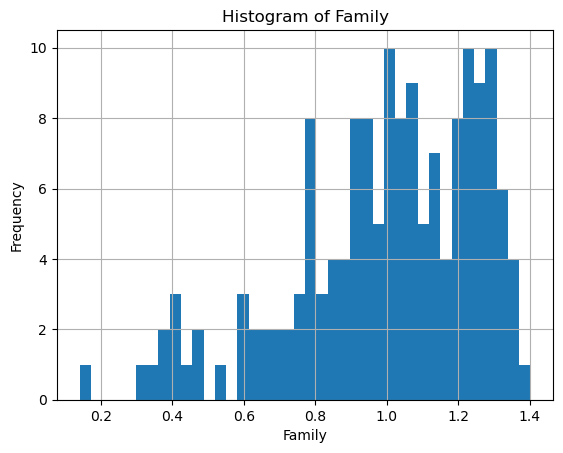

In [310]:
# normal distrubution of Family.
hap1 = Happyness_2015[Happyness_2015["Family"] > 0]
plt.hist(hap1["Family"],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 10 #
          )

plt.xlabel('Family')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Family')
plt.show()
# normal distrubution.
hap1 = Happyness_2015[Happyness_2015["Family"] > 0]
plt.hist(hap1["Family"],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 40 #
          )

plt.xlabel('Family')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Family')
plt.show()




In [311]:
#see the min outliers
# low Family
Happyness_2015[Happyness_2015["Family"] <= 0.30].sort_values(by="Family", ascending=False)


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230


In [312]:
#see the min outliers and the max 
# top Family
Happyness_2015[Happyness_2015["Family"] >= 1.3].sort_values(by="Family", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
17,Ireland,Western Europe,18,6.940,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
8,New Zealand,Australia and New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
5,Finland,Western Europe,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
35,Spain,Western Europe,36,6.329,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367


### View Health

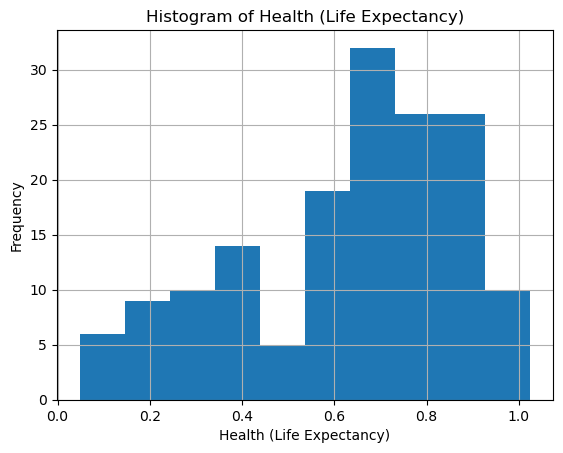

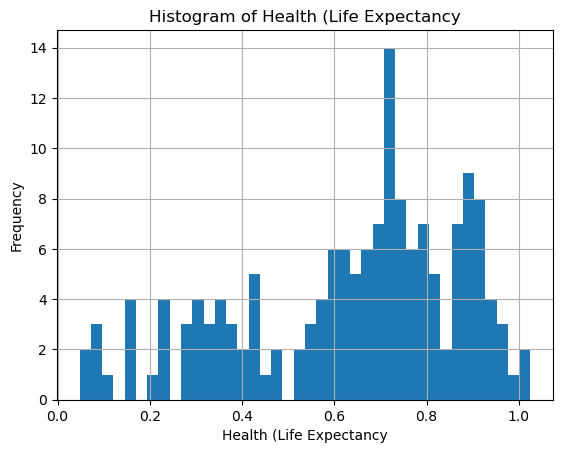

In [313]:
# normal distrubution of Health (Life Expectancy).
hap1 = Happyness_2015[Happyness_2015["Health (Life Expectancy)"] > 0]
plt.hist(hap1["Health (Life Expectancy)"],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 10 #
          )

plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Health (Life Expectancy)')
plt.show()
# normal distrubution.
hap1 = Happyness_2015[Happyness_2015["Health (Life Expectancy)"] > 0]
plt.hist(hap1["Health (Life Expectancy)"],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 40 #
          )

plt.xlabel('Health (Life Expectancy')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Health (Life Expectancy')
plt.show()


In [314]:
#see the min outliers
# low Health (Life Expectancy)
Happyness_2015[Happyness_2015["Health (Life Expectancy)"] <= 0.2].sort_values(by="Health (Life Expectancy)", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
136,Angola,Sub-Saharan Africa,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
77,Nigeria,Sub-Saharan Africa,78,5.268,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
148,Chad,Sub-Saharan Africa,149,3.667,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.00000,1.00120,0.09806,0.22605,0.07625,0.24834,2.86712
93,Mozambique,Sub-Saharan Africa,94,4.971,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137
96,Lesotho,Sub-Saharan Africa,97,4.898,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
100,Swaziland,Sub-Saharan Africa,101,4.867,0.71206,1.07284,0.07566,0.30658,0.03060,0.18259,2.48676
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.07850,0.00000,0.06699,0.48879,0.08289,0.23835,2.72230
127,Botswana,Sub-Saharan Africa,128,4.332,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181


In [315]:
#see the min outliers and the max 
# top Health (Life Expectancy)
Happyness_2015[Happyness_2015["Health (Life Expectancy)"] >= 0.9].sort_values(by="Health (Life Expectancy)", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
23,Singapore,Southeastern Asia,24,6.798,1.52186,1.02000,1.02525,0.54252,0.49210,0.31105,1.88501
71,Hong Kong,Eastern Asia,72,5.474,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
45,Japan,Eastern Asia,46,5.987,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,South Korea,Eastern Asia,47,5.984,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
35,Spain,Western Europe,36,6.329,1.23011,1.31379,0.95562,0.45951,0.06398,0.18227,2.12367
49,Italy,Western Europe,50,5.948,1.25114,1.19777,0.95446,0.26236,0.02901,0.22823,2.02518
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
28,France,Western Europe,29,6.575,1.27778,1.26038,0.94579,0.55011,0.20646,0.12332,2.21126
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### View Freedom 

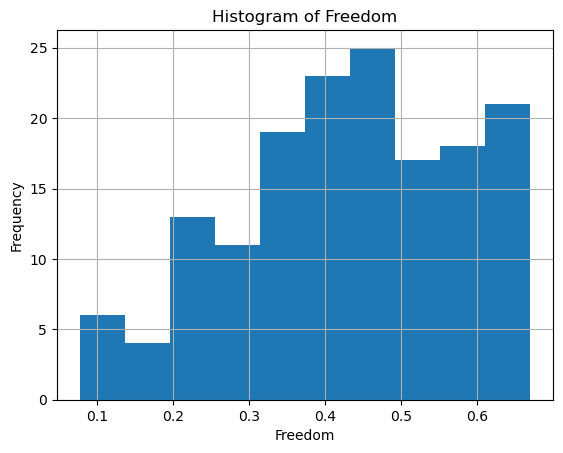

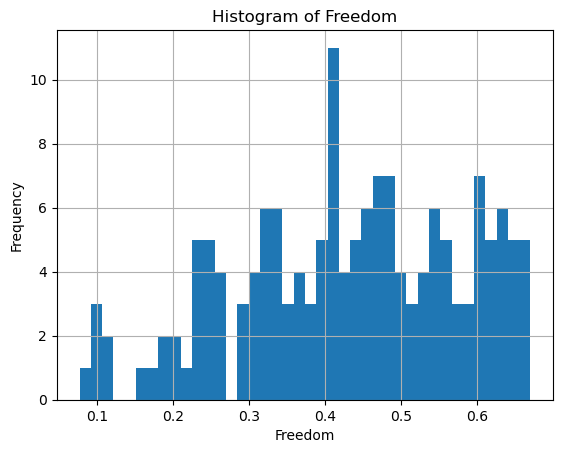

In [316]:
# Normal distribution of Freedom
hap1 = Happyness_2015[Happyness_2015["Freedom"] > 0]
plt.hist(hap1["Freedom"],
         # facecolor='b', edgecolor='red',
         bins=10
         )

plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Freedom')
plt.show()

# Normal distribution.
hap1 = Happyness_2015[Happyness_2015["Freedom"] > 0]
plt.hist(hap1["Freedom"],
         # facecolor='b', edgecolor='red',
         bins=40
         )

plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Freedom')
plt.show()


In [317]:
# See the min outliers
# Low Freedom
Happyness_2015[Happyness_2015["Freedom"] <= 0.2].sort_values(by="Freedom", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
126,Armenia,Central and Eastern Europe,127,4.350,0.76821,0.77711,0.72990,0.19847,0.03900,0.07855,1.75873
146,Madagascar,Sub-Saharan Africa,147,3.681,0.20824,0.66801,0.46721,0.19184,0.08124,0.21333,1.85100
82,Montenegro,Central and Eastern Europe,82,5.192,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017
134,Egypt,Middle East and Northern Africa,135,4.194,0.88180,0.74700,0.61712,0.17288,0.06324,0.11291,1.59927
155,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
80,Pakistan,Southern Asia,81,5.194,0.59543,0.41411,0.51466,0.12102,0.10464,0.33671,3.10709
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
136,Angola,Sub-Saharan Africa,137,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939
117,Sudan,Sub-Saharan Africa,118,4.550,0.52107,1.01404,0.36878,0.10081,0.14660,0.19062,2.20857
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367


In [318]:
# See the outliers of max
# Top Freedom
Happyness_2015[Happyness_2015["Freedom"] >= 0.65].sort_values(by="Freedom", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
144,Cambodia,Southeastern Asia,145,3.819,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
7,Sweden,Western Europe,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
43,Uzbekistan,Central and Eastern Europe,44,6.003,0.63244,1.34043,0.59772,0.65821,0.30826,0.22837,2.23741
9,Australia,Australia and New Zealand,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### Trust (Government Corruption)

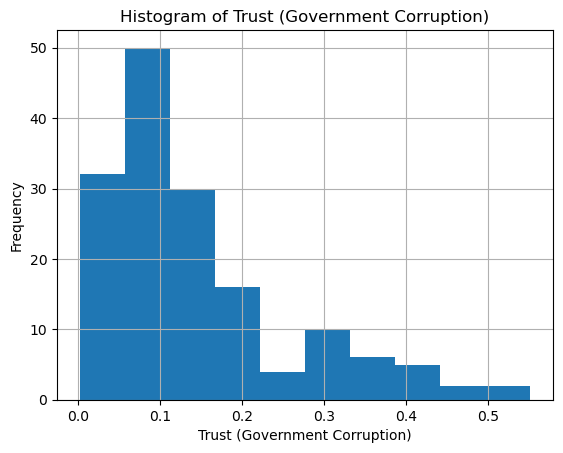

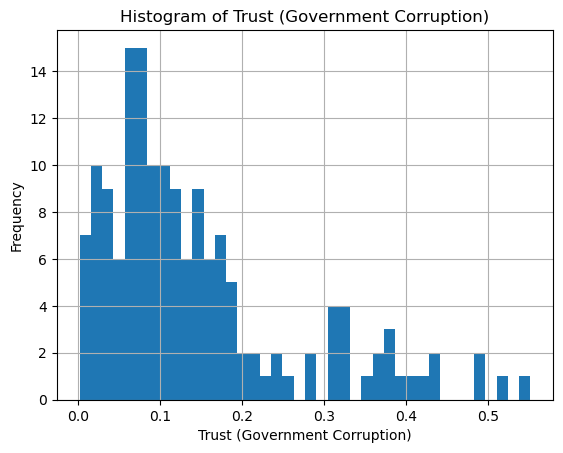

In [319]:
# Normal distribution of Trust (Government Corruption)
hap1 = Happyness_2015[Happyness_2015["Trust (Government Corruption)"] > 0]
plt.hist(hap1["Trust (Government Corruption)"],
         # facecolor='b', edgecolor='red',
         bins=10
         )

plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Trust (Government Corruption)')
plt.show()

# Normal distribution.
hap1 = Happyness_2015[Happyness_2015["Trust (Government Corruption)"] > 0]
plt.hist(hap1["Trust (Government Corruption)"],
         # facecolor='b', edgecolor='red',
         bins=40
         )

plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Trust (Government Corruption)')
plt.show()


In [320]:
# See the min outliers
# Low Trust (Government Corruption)
Happyness_2015[Happyness_2015["Trust (Government Corruption)"] <= 0.02].sort_values(by="Trust (Government Corruption)", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
51,Moldova,Central and Eastern Europe,52,5.889,0.59448,1.01528,0.61826,0.32818,0.01615,0.20951,3.10712
101,Greece,Western Europe,102,4.857,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101
40,Trinidad and Tobago,Latin America and Caribbean,41,6.168,1.21183,1.18354,0.61483,0.55884,0.01140,0.31844,2.26882
87,Portugal,Western Europe,88,5.102,1.15991,1.13935,0.87519,0.51469,0.01078,0.13719,1.26462
55,Lithuania,Central and Eastern Europe,56,5.833,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649
133,Bulgaria,Central and Eastern Europe,134,4.218,1.01216,1.10614,0.76649,0.30587,0.00872,0.11921,0.89991
85,Romania,Central and Eastern Europe,86,5.124,1.04345,0.88588,0.76890,0.35068,0.00649,0.13748,1.93129
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367
73,Indonesia,Southeastern Asia,74,5.399,0.82827,1.08708,0.63793,0.46611,0.00000,0.51535,1.86399


In [321]:
# See the min outliers and the max
# Top Trust (Government Corruption)
Happyness_2015[Happyness_2015["Trust (Government Corruption)"] >= 0.49].sort_values(by="Trust (Government Corruption)", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.7737,0.42864,0.59201,0.55191,0.22628,0.67042
27,Qatar,Middle East and Northern Africa,28,6.611,1.69042,1.0786,0.79733,0.64040,0.52208,0.32573,1.55674
23,Singapore,Southeastern Asia,24,6.798,1.52186,1.0200,1.02525,0.54252,0.49210,0.31105,1.88501


### Generosity


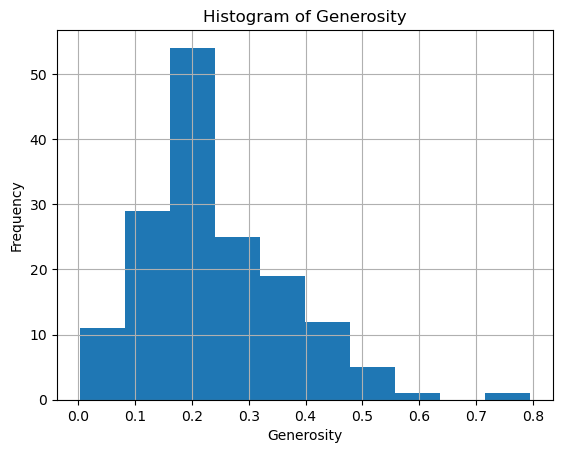

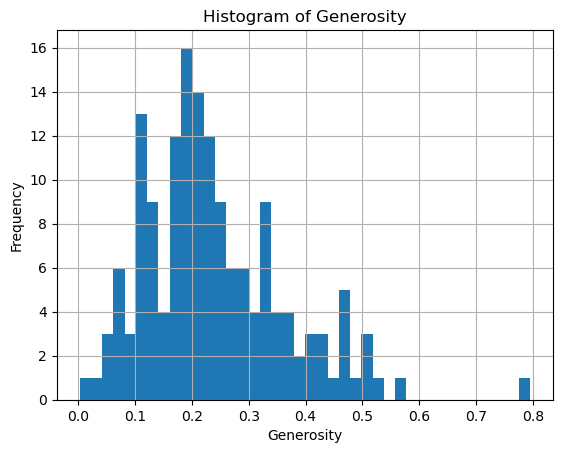

In [322]:
# Normal distribution of Generosity
hap1 = Happyness_2015[Happyness_2015["Generosity"] > 0]
plt.hist(hap1["Generosity"],
         # facecolor='b', edgecolor='red',
         bins=10
         )

plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Generosity')
plt.show()

# Normal distribution.
hap1 = Happyness_2015[Happyness_2015["Generosity"] > 0]
plt.hist(hap1["Generosity"],
         # facecolor='b', edgecolor='red',
         bins=40
         )

plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Generosity')
plt.show()


In [323]:
# See the min outliers
# Low Generosity
Happyness_2015[Happyness_2015["Generosity"] <= 0.04].sort_values(by="Generosity", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
55,Lithuania,Central and Eastern Europe,56,5.833,1.14723,1.25745,0.73128,0.21342,0.01031,0.02641,2.44649
63,Russia,Central and Eastern Europe,64,5.716,1.13764,1.23617,0.66926,0.36679,0.03005,0.00199,2.27394
101,Greece,Western Europe,102,4.857,1.15406,0.92933,0.88213,0.07699,0.01397,0.00000,1.80101


In [324]:
# See the min outliers and the max
# Top Generosity
Happyness_2015[Happyness_2015["Generosity"] >= 0.7].sort_values(by="Generosity", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
128,Myanmar,Southeastern Asia,129,4.307,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805


### View Dystopia Residual

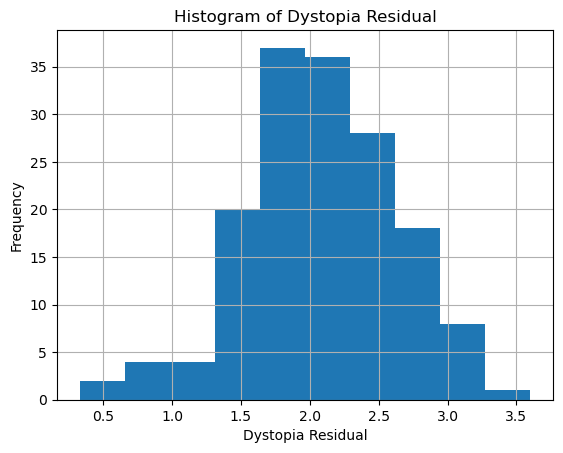

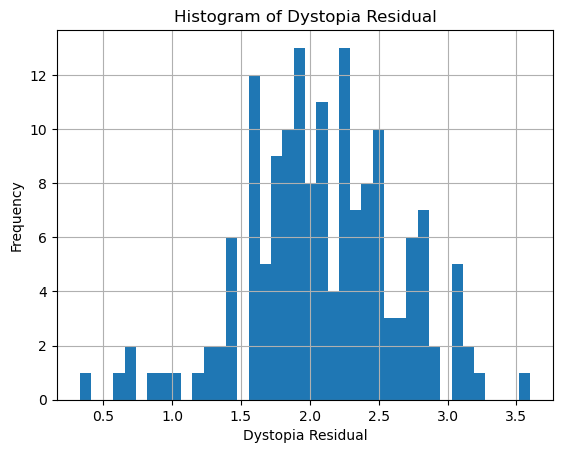

In [325]:
# Normal distribution of Dystopia Residual
hap1 = Happyness_2015[Happyness_2015["Dystopia Residual"] > 0]
plt.hist(hap1["Dystopia Residual"],
         # facecolor='b', edgecolor='red',
         bins=10
         )

plt.xlabel('Dystopia Residual')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Dystopia Residual')
plt.show()

# Normal distribution.
hap1 = Happyness_2015[Happyness_2015["Dystopia Residual"] > 0]
plt.hist(hap1["Dystopia Residual"],
         # facecolor='b', edgecolor='red',
         bins=40
         )

plt.xlabel('Dystopia Residual')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Dystopia Residual')
plt.show()


In [326]:
# See the min outliers
# Low Dystopia Residual
Happyness_2015[Happyness_2015["Dystopia Residual"] <= 0.5].sort_values(by="Dystopia Residual", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
155,Syria,Middle East and Northern Africa,156,3.006,0.6632,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858


In [327]:
# See the min outliers and the max
# Top Dystopia Residual
Happyness_2015[Happyness_2015["Dystopia Residual"] >= 3.2].sort_values(by="Dystopia Residual", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
13,Mexico,Latin America and Caribbean,14,7.187,1.02054,0.91451,0.81444,0.48181,0.21312,0.14074,3.60214
15,Brazil,Latin America and Caribbean,16,6.983,0.98124,1.23287,0.69702,0.49049,0.17521,0.14574,3.26001


# 2016 visulize 

### View Happy Score

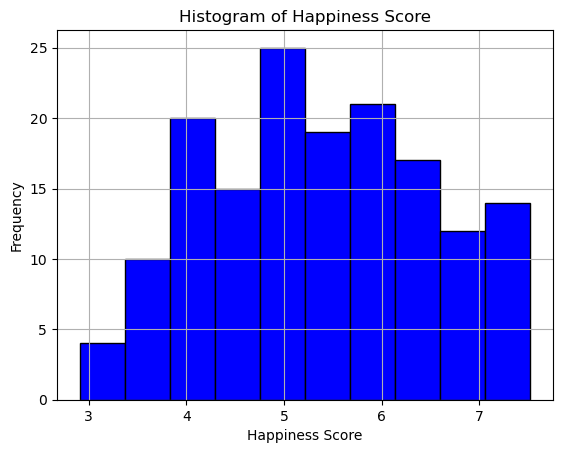

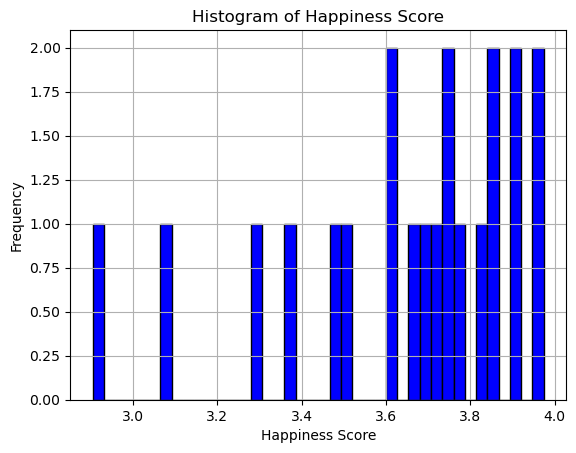

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Madagascar,Sub-Saharan Africa,148,3.695,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,Sub-Saharan Africa,149,3.666,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,Sub-Saharan Africa,150,3.622,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,Sub-Saharan Africa,151,3.607,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,Sub-Saharan Africa,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [328]:
# Normal distribution of Happiness Score
hap1 = Happyness_2016[Happyness_2016["Happiness Score"] > 0]
plt.hist(hap1['Happiness Score'],
         facecolor='b', edgecolor='black',
         bins=10  # bins = 6 means 6 bars
         )

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()

# The distribution of Happiness Score shows there may be outliers in the data (0-4).
# We see this more clearly after using 40 bins.
hap1 = Happyness_2016[Happyness_2016["Happiness Score"] < 4]
plt.hist(hap1['Happiness Score'],
         facecolor='b', edgecolor='black',
         bins=40  # bins = 6 means 6 bars
         )

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()

#We check our data, i see nothing wrong with it. 
#low happy score
Happyness_2016.tail(10)


### Economy (GDP per Capita)

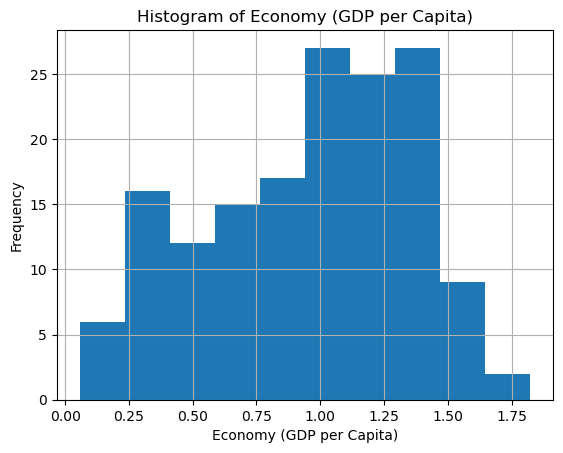

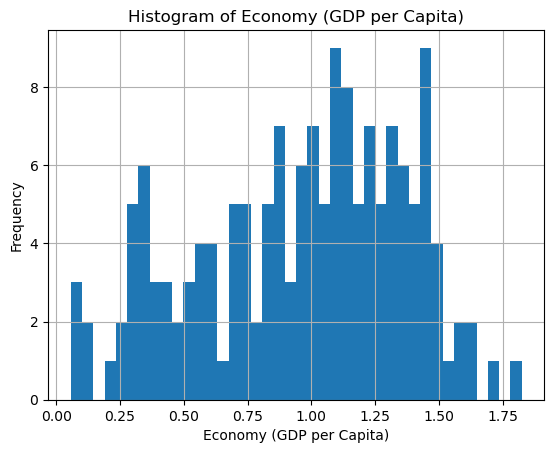

In [329]:
# normal distrubution.
hap1 = Happyness_2016[Happyness_2016["Economy (GDP per Capita)"] > 0]
plt.hist(hap1["Economy (GDP per Capita)"],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 10 #
          )

plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Economy (GDP per Capita)')
plt.show()
# not a normal distrubution of Economy (GDP per Capita).
hap1 = Happyness_2016[Happyness_2016["Economy (GDP per Capita)"] > 0]
plt.hist(hap1["Economy (GDP per Capita)"],
         #,facecolor = 'b', edgecolor = 'red',
          bins = 40 #
          )

plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Economy (GDP per Capita)')
plt.show()



In [330]:
#see the min outliers
# low Economy (GDP per Capita)
Happyness_2016[Happyness_2016["Economy (GDP per Capita)"] <= 0.10].sort_values(by="Economy (GDP per Capita)", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
131,Malawi,Sub-Saharan Africa,132,4.156,0.08709,0.14700,0.29364,0.41430,0.07564,0.30968,2.82859
156,Burundi,Sub-Saharan Africa,157,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404
124,Congo (Kinshasa),Sub-Saharan Africa,125,4.272,0.05661,0.80676,0.18800,0.15602,0.06075,0.25458,2.74924
75,Somalia,Sub-Saharan Africa,76,5.440,0.00000,0.33613,0.11466,0.56778,0.31180,0.27225,3.83772


In [331]:
#see the min outliers and the max 
# top Economy (GDP per Capita)
Happyness_2016[Happyness_2016["Economy (GDP per Capita)"] >= 1.6].sort_values(by="Economy (GDP per Capita)", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
35,Qatar,Middle East and Northern Africa,36,6.375,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224
19,Luxembourg,Western Europe,20,6.871,1.69752,1.03999,0.84542,0.54870,0.35329,0.27571,2.11055
21,Singapore,Southeastern Asia,22,6.739,1.64555,0.86758,0.94719,0.48770,0.46987,0.32706,1.99375
40,Kuwait,Middle East and Northern Africa,41,6.239,1.61714,0.87758,0.63569,0.43166,0.23669,0.15965,2.28085


### View Family

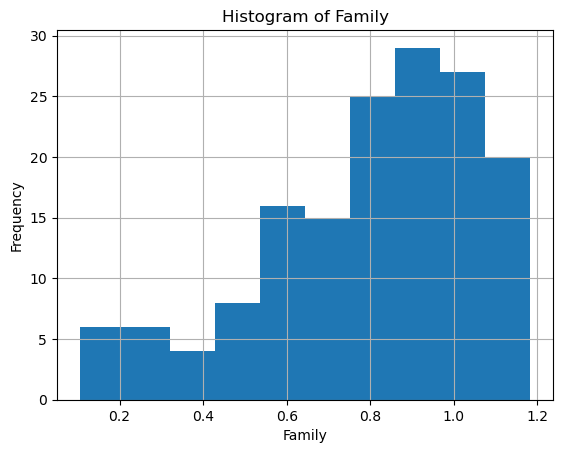

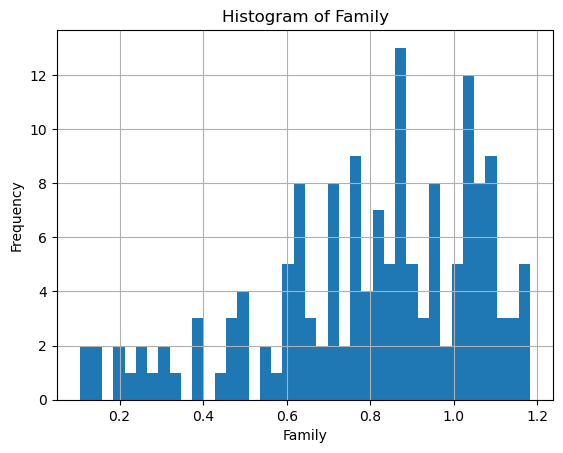

In [332]:
# Normal distribution.
hap1 = Happyness_2016[Happyness_2016["Family"] > 0]
plt.hist(hap1["Family"],
         # facecolor='b', edgecolor='red',
         bins=10
         )

plt.xlabel('Family')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Family')
plt.show()

# Not a normal distribution of Family.
hap1 = Happyness_2016[Happyness_2016["Family"] > 0]
plt.hist(hap1["Family"],
         # facecolor='b', edgecolor='red',
         bins=40
         )

plt.xlabel('Family')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Family')
plt.show()


In [333]:
# See the min outliers
# Low Family
Happyness_2016[Happyness_2016["Family"] <= 0.10].sort_values(by="Family", ascending=False)


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.0,0.24811,0.34678,0.11587,0.17517,2.1354


In [334]:
# See the min outliers and the max
# Top Family
Happyness_2016[Happyness_2016["Family"] >= 1.15].sort_values(by="Family", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
7,New Zealand,Australia and New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
48,Uzbekistan,Central and Eastern Europe,49,5.987,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
18,Ireland,Western Europe,19,6.907,1.48341,1.16157,0.81455,0.54008,0.29754,0.44963,2.15988


### View Health (Life Expectancy)

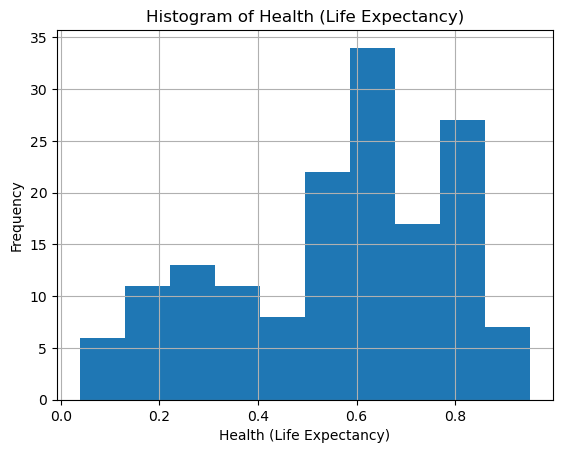

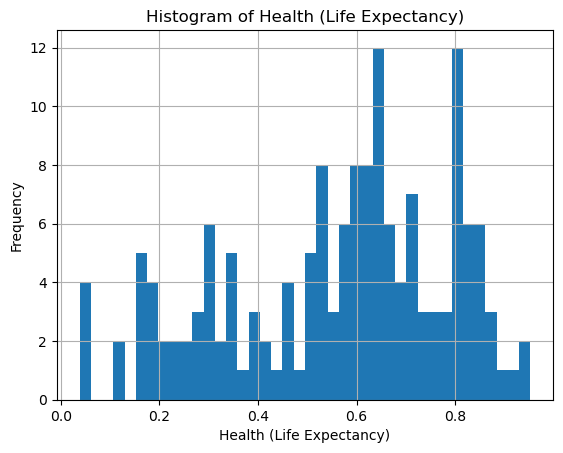

In [335]:
# Normal distribution.
hap1 = Happyness_2016[Happyness_2016["Health (Life Expectancy)"] > 0]
plt.hist(hap1["Health (Life Expectancy)"], bins=10)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Health (Life Expectancy)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Health (Life Expectancy)"], bins=40)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Health (Life Expectancy)')
plt.show()


In [336]:
# Min outliers
Happyness_2016[Happyness_2016["Health (Life Expectancy)"] <= 0.10].sort_values(by="Health (Life Expectancy)", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
102,Nigeria,Sub-Saharan Africa,103,4.875,0.75216,0.64498,0.05108,0.27854,0.03050,0.23219,2.88586
140,Angola,Sub-Saharan Africa,141,3.866,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
138,Ivory Coast,Sub-Saharan Africa,139,3.916,0.55507,0.57576,0.04476,0.40663,0.15530,0.20338,1.97478
143,Chad,Sub-Saharan Africa,144,3.763,0.42214,0.63178,0.03824,0.12807,0.04952,0.18667,2.30637
110,Sierra Leone,Sub-Saharan Africa,111,4.635,0.36485,0.62800,0.00000,0.30685,0.08196,0.23897,3.01402


In [337]:
# Top outliers
Happyness_2016[Happyness_2016["Health (Life Expectancy)"] >= 0.9].sort_values(by="Health (Life Expectancy)", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
74,Hong Kong,Eastern Asia,75,5.458,1.51070,0.87021,0.95277,0.48079,0.31647,0.40097,0.92614
21,Singapore,Southeastern Asia,22,6.739,1.64555,0.86758,0.94719,0.48770,0.46987,0.32706,1.99375
52,Japan,Eastern Asia,53,5.921,1.38007,1.06054,0.91491,0.46761,0.18985,0.10224,1.80584


### View Freedom

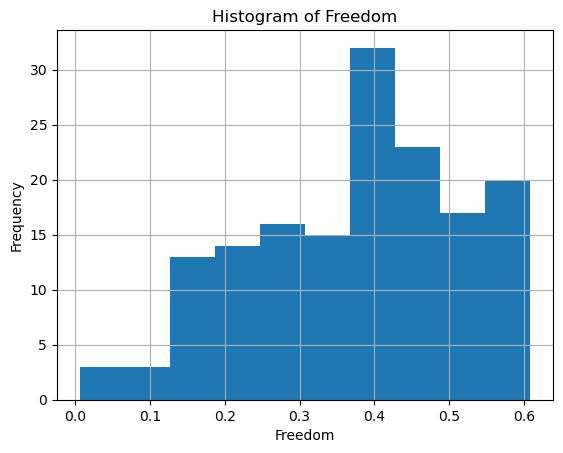

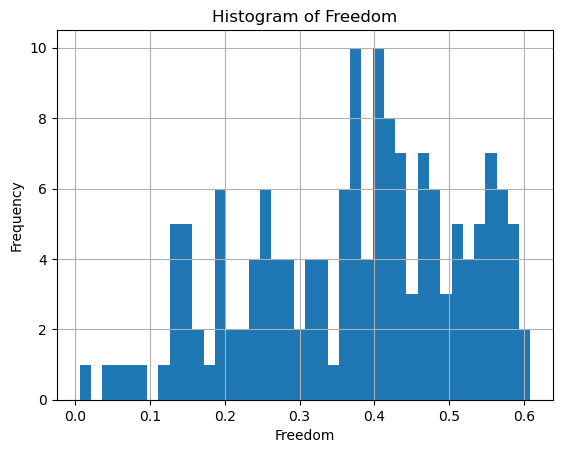

In [338]:
# Normal distribution.
hap1 = Happyness_2016[Happyness_2016["Freedom"] > 0]
plt.hist(hap1["Freedom"], bins=10)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Freedom')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Freedom"], bins=40)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Freedom')
plt.show()


In [339]:
# Min outliers
Happyness_2016[Happyness_2016["Freedom"] <= 0.10].sort_values(by="Freedom", ascending=False)


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
86,Bosnia and Herzegovina,Central and Eastern Europe,87,5.163,0.93383,0.64367,0.70766,0.09511,0.00000,0.29889,2.48406
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
98,Greece,Western Europe,99,5.033,1.24886,0.75473,0.80029,0.05822,0.04127,0.00000,2.12944
156,Burundi,Sub-Saharan Africa,157,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404
140,Angola,Sub-Saharan Africa,141,3.866,0.84731,0.66366,0.04991,0.00589,0.08434,0.12071,2.09459
132,Sudan,Sub-Saharan Africa,133,4.139,0.63069,0.81928,0.29759,0.00000,0.10039,0.18077,2.10995


In [340]:
# Top outliers
Happyness_2016[Happyness_2016["Freedom"] >= 0.58].sort_values(by="Freedom", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
48,Uzbekistan,Central and Eastern Europe,49,5.987,0.73591,1.16810,0.50163,0.60848,0.28333,0.34326,2.34638
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
139,Cambodia,Southeastern Asia,140,3.907,0.55604,0.53750,0.42494,0.58852,0.08092,0.40339,1.31573
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
9,Sweden,Western Europe,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734
7,New Zealand,Australia and New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553


### View Trust (Government Corruption)

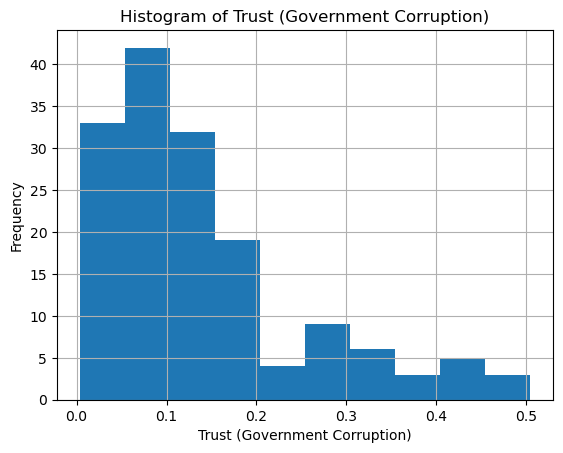

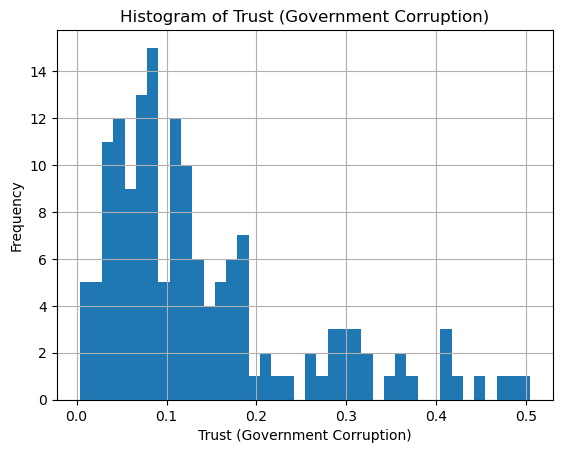

In [341]:
# Normal distribution.
hap1 = Happyness_2016[Happyness_2016["Trust (Government Corruption)"] > 0]
plt.hist(hap1["Trust (Government Corruption)"], bins=10)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Trust (Government Corruption)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Trust (Government Corruption)"], bins=40)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Trust (Government Corruption)')
plt.show()


In [342]:
# Min outliers
Happyness_2016[Happyness_2016["Trust (Government Corruption)"] <= 0.005].sort_values(by="Trust (Government Corruption)", ascending=False)


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
78,Indonesia,Southeastern Asia,79,5.314,0.95104,0.87625,0.49374,0.39237,0.00322,0.56521,2.03171
86,Bosnia and Herzegovina,Central and Eastern Europe,87,5.163,0.93383,0.64367,0.70766,0.09511,0.00000,0.29889,2.48406


In [343]:
# Top outliers
Happyness_2016[Happyness_2016["Trust (Government Corruption)"] >= 0.48].sort_values(by="Trust (Government Corruption)", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
151,Rwanda,Sub-Saharan Africa,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
35,Qatar,Middle East and Northern Africa,36,6.375,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224


### View Generosity

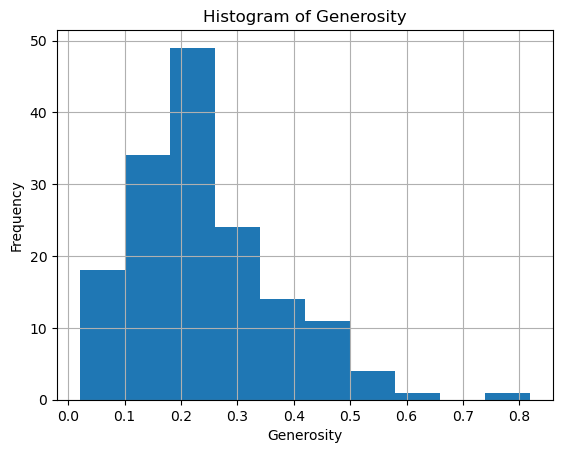

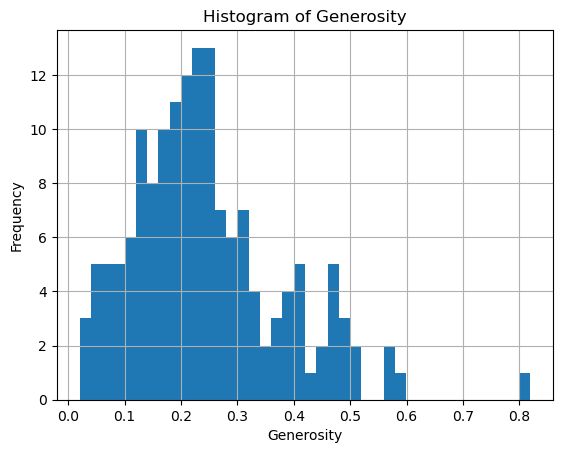

In [344]:
# Normal distribution.
hap1 = Happyness_2016[Happyness_2016["Generosity"] > 0]
plt.hist(hap1["Generosity"], bins=10)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Generosity')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Generosity"], bins=40)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Generosity')
plt.show()


In [345]:
# Min outliers
Happyness_2016[Happyness_2016["Generosity"] <= 0.03].sort_values(by="Generosity", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
55,Russia,Central and Eastern Europe,56,5.856,1.23228,1.05261,0.58991,0.32682,0.03586,0.02736,2.59115
59,Lithuania,Central and Eastern Europe,60,5.813,1.26920,1.06411,0.64674,0.18929,0.01820,0.02025,2.60525
98,Greece,Western Europe,99,5.033,1.24886,0.75473,0.80029,0.05822,0.04127,0.00000,2.12944


In [346]:
# Top outliers
Happyness_2016[Happyness_2016["Generosity"] >= 0.6].sort_values(by="Generosity", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
118,Myanmar,Southeastern Asia,119,4.395,0.34112,0.69981,0.3988,0.42692,0.20243,0.81971,1.50655


### View Dystopia Residual


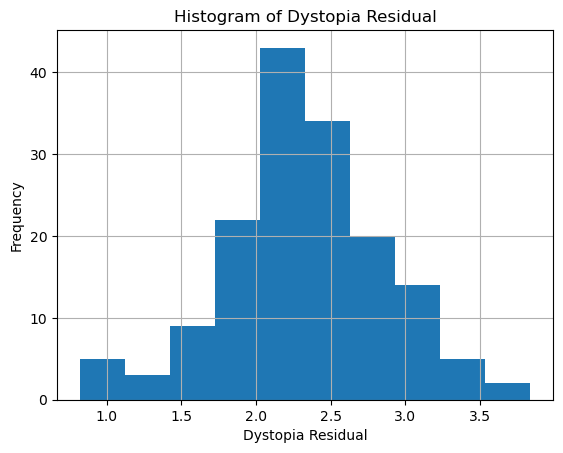

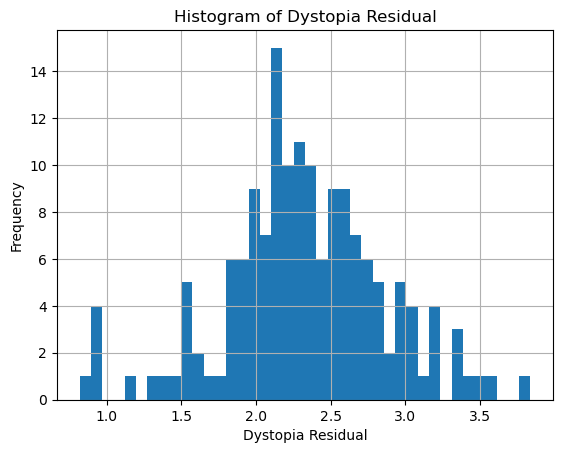

In [347]:
# Normal distribution.
hap1 = Happyness_2016[Happyness_2016["Dystopia Residual"] > 0]
plt.hist(hap1["Dystopia Residual"], bins=10)
plt.xlabel('Dystopia Residual')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Dystopia Residual')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Dystopia Residual"], bins=40)
plt.xlabel('Dystopia Residual')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Dystopia Residual')
plt.show()


In [348]:
# Min outliers
Happyness_2016[Happyness_2016["Dystopia Residual"] <= 1.0].sort_values(by="Dystopia Residual", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
151,Rwanda,Sub-Saharan Africa,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
136,Botswana,Sub-Saharan Africa,137,3.974,1.09426,0.89186,0.34752,0.44089,0.10769,0.12425,0.96741
74,Hong Kong,Eastern Asia,75,5.458,1.51070,0.87021,0.95277,0.48079,0.31647,0.40097,0.92614
116,Sri Lanka,Southern Asia,117,4.415,0.97318,0.84783,0.62007,0.50817,0.07964,0.46978,0.91681
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [349]:
# Top outliers
Happyness_2016[Happyness_2016["Dystopia Residual"] >= 3.8].sort_values(by="Dystopia Residual", ascending=False)

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
75,Somalia,Sub-Saharan Africa,76,5.44,0.0,0.33613,0.11466,0.56778,0.3118,0.27225,3.83772


# View 2017

### View Happy Score

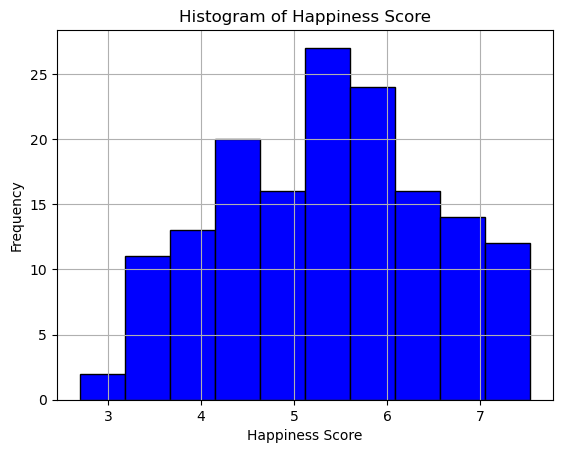

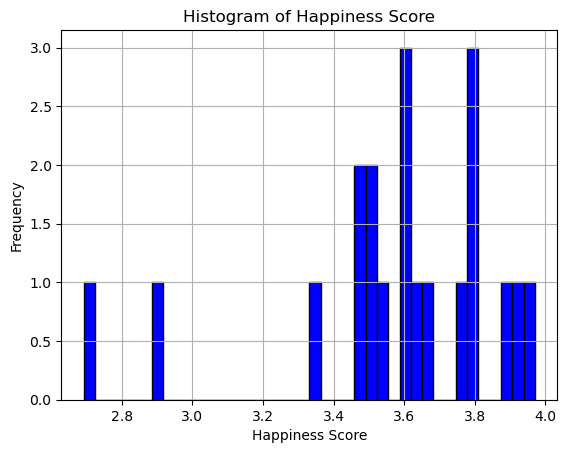

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
145,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,Middle East and Northern Africa
146,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,Sub-Saharan Africa
147,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,Sub-Saharan Africa
148,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,Sub-Saharan Africa
149,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,Sub-Saharan Africa
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,Sub-Saharan Africa
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,Middle East and Northern Africa
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,Sub-Saharan Africa
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Sub-Saharan Africa
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,Sub-Saharan Africa


In [350]:
### View Happy Score

# Normal distribution of Happiness Score
hap1 = Happyness_2017[Happyness_2017["Happiness Score"] > 0]
plt.hist(hap1['Happiness Score'],
         facecolor='b', edgecolor='black',
         bins=10  # bins = 6 means 6 bars
         )

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()

# The distribution of Happiness Score shows there may be outliers in the data (0-4).
# We see this more clearly after using 40 bins.
hap1 = Happyness_2017[Happyness_2017["Happiness Score"] < 4]
plt.hist(hap1['Happiness Score'],
         facecolor='b', edgecolor='black',
         bins=40  # bins = 6 means 6 bars
         )

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()
#We check our data, i see nothing wrong with it. 
#low happy score
Happyness_2017.tail(10)


In [351]:
# Checking the data for low Happiness Score
Happyness_2017.tail(10)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
145,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.104125,0.056767,1.345601,Middle East and Northern Africa
146,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.285671,0.116794,1.879567,Sub-Saharan Africa
147,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286,Sub-Saharan Africa
148,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.264815,0.110938,1.552312,Sub-Saharan Africa
149,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,Sub-Saharan Africa
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,Sub-Saharan Africa
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,Middle East and Northern Africa
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,Sub-Saharan Africa
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Sub-Saharan Africa
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,Sub-Saharan Africa


### Economy (GDP per Capita)

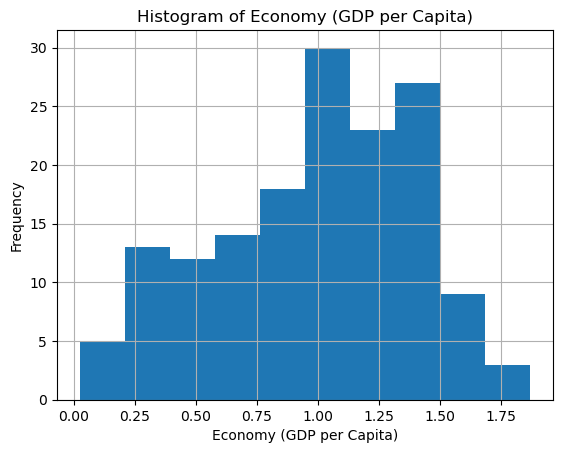

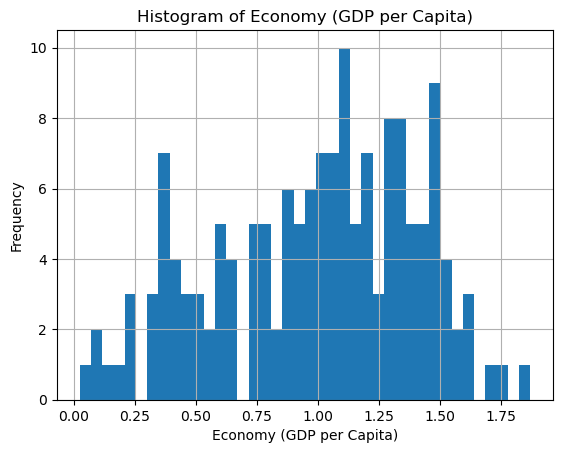

In [352]:
# Normal distribution.
hap1 = Happyness_2017[Happyness_2017["Economy (GDP per Capita)"] > 0]
plt.hist(hap1["Economy (GDP per Capita)"], bins=10)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Economy (GDP per Capita)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Economy (GDP per Capita)"], bins=40)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Economy (GDP per Capita)')
plt.show()


In [353]:
# Min outliers
Happyness_2017[Happyness_2017["Economy (GDP per Capita)"] <= 0.1].sort_values(by="Economy (GDP per Capita)", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
125,Congo (Kinshasa),126,4.280,0.092102,1.229023,0.191407,0.235961,0.246456,0.060241,2.224959,Sub-Saharan Africa
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Sub-Saharan Africa
92,Somalia,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485,Sub-Saharan Africa
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,Sub-Saharan Africa


In [354]:
# Top outliers
Happyness_2017[Happyness_2017["Economy (GDP per Capita)"] >= 1.5].sort_values(by="Economy (GDP per Capita)", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
34,Qatar,35,6.375,1.870766,1.274297,0.710098,0.604131,0.330474,0.439299,1.145464,Middle East and Northern Africa
17,Luxembourg,18,6.863,1.741944,1.457584,0.845089,0.596628,0.283181,0.318834,1.619512,Western Europe
25,Singapore,26,6.572,1.692278,1.353814,0.949492,0.549841,0.345966,0.464308,1.216362,Southeastern Asia
38,Kuwait,39,6.105,1.632952,1.259699,0.632106,0.496338,0.228290,0.215160,1.640425,Middle East and Northern Africa
20,United Arab Emirates,21,6.648,1.626343,1.266410,0.726798,0.608345,0.360942,0.324490,1.734704,Middle East and Northern Africa
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,Eastern Asia
13,United States,14,6.993,1.546259,1.419921,0.774287,0.505741,0.392579,0.135639,2.218113,North America
14,Ireland,15,6.977,1.535707,1.558231,0.809783,0.573110,0.427858,0.298388,1.773869,Western Europe


### View Family

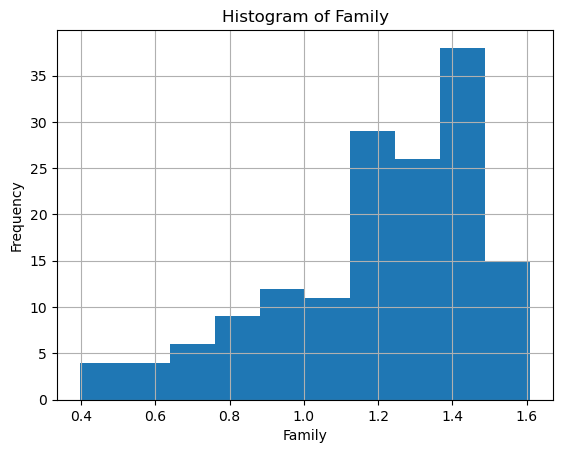

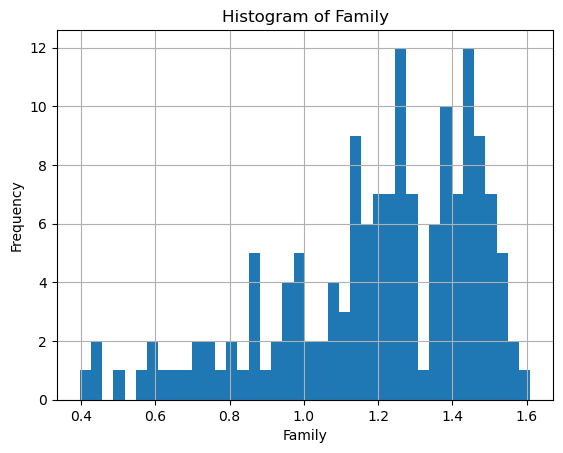

In [355]:
# Normal distribution.
hap1 = Happyness_2017[Happyness_2017["Family"] > 0]
plt.hist(hap1["Family"], bins=10)
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Family')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Family"], bins=40)
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Family')
plt.show()


In [356]:
# Min outliers
Happyness_2017[Happyness_2017["Family"] <= 0.5].sort_values(by="Family", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
142,Benin,143,3.657,0.431085,0.435300,0.209930,0.425963,0.207948,0.060929,1.885631,Sub-Saharan Africa
149,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229,Sub-Saharan Africa
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,Middle East and Northern Africa
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,Sub-Saharan Africa


In [357]:
# Top outliers
Happyness_2017[Happyness_2017["Family"] >= 1.6].sort_values(by="Family", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.47554,0.153527,2.322715,Western Europe


### Health (Life Expectancy)

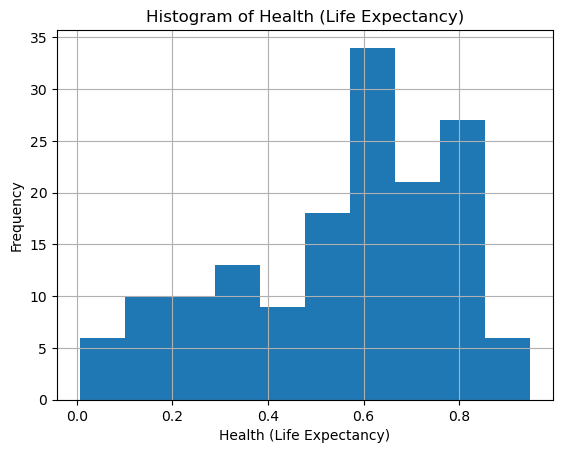

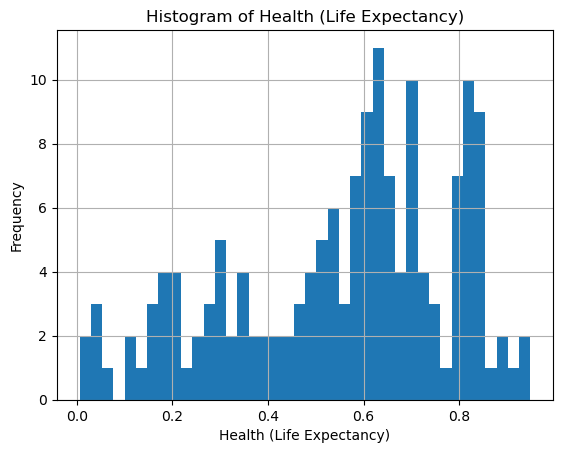

In [358]:
# Normal distribution.
hap1 = Happyness_2017[Happyness_2017["Health (Life Expectancy)"] > 0]
plt.hist(hap1["Health (Life Expectancy)"], bins=10)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Health (Life Expectancy)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Health (Life Expectancy)"], bins=40)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Health (Life Expectancy)')
plt.show()


In [359]:
# Min outliers
Happyness_2017[Happyness_2017["Health (Life Expectancy)"] <= 0.1].sort_values(by="Health (Life Expectancy)", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
94,Nigeria,95,5.074,0.783756,1.215770,0.056916,0.394953,0.230947,0.026122,2.365391,Sub-Saharan Africa
139,Angola,140,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,Sub-Saharan Africa
127,Ivory Coast,128,4.180,0.603049,0.904780,0.048642,0.447706,0.201237,0.130062,1.844964,Sub-Saharan Africa
136,Chad,137,3.936,0.438013,0.953856,0.041135,0.162342,0.216114,0.053582,2.071238,Sub-Saharan Africa
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,Sub-Saharan Africa
105,Sierra Leone,106,4.709,0.368421,0.984136,0.005565,0.318698,0.293041,0.071095,2.668460,Sub-Saharan Africa
138,Lesotho,139,3.808,0.521021,1.190095,0.000000,0.390661,0.157497,0.119095,1.429835,Sub-Saharan Africa


In [360]:
# Top outliers
Happyness_2017[Happyness_2017["Health (Life Expectancy)"] >= 0.9].sort_values(by="Health (Life Expectancy)", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
25,Singapore,26,6.572,1.692278,1.353814,0.949492,0.549841,0.345966,0.464308,1.216362,Southeastern Asia
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,Eastern Asia
50,Japan,51,5.920,1.416915,1.436338,0.913476,0.505626,0.120573,0.163761,1.363224,Eastern Asia
54,South Korea,55,5.838,1.401678,1.128274,0.900214,0.257922,0.206674,0.063283,1.880378,Eastern Asia


### Freedom 

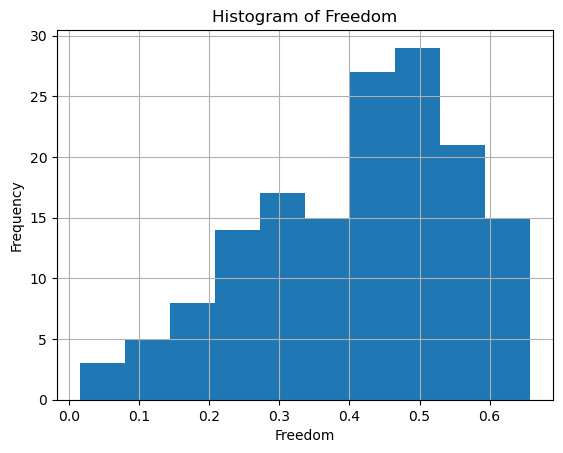

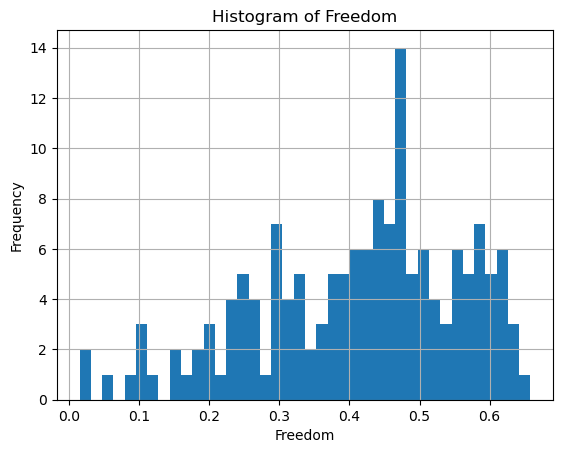

In [361]:
# Normal distribution.
hap1 = Happyness_2017[Happyness_2017["Freedom"] > 0]
plt.hist(hap1["Freedom"], bins=10)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Freedom')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Freedom"], bins=40)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Freedom')
plt.show()


In [362]:
# Min outliers
Happyness_2017[Happyness_2017["Freedom"] <= 0.1].sort_values(by="Freedom", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
122,Mauritania,123,4.292,0.648457,1.272031,0.285349,0.096098,0.201870,0.136957,1.651637,Sub-Saharan Africa
86,Greece,87,5.227,1.289487,1.239415,0.810199,0.095731,0.000000,0.043290,1.749222,Western Europe
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,Middle East and Northern Africa
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,Sub-Saharan Africa
144,Haiti,145,3.603,0.368610,0.640450,0.277321,0.030370,0.489204,0.099872,1.697168,Latin America and Caribbean
129,Sudan,130,4.139,0.659517,1.214009,0.290921,0.014996,0.182317,0.089848,1.687066,Sub-Saharan Africa
139,Angola,140,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482,Sub-Saharan Africa


In [363]:
# Top outliers
Happyness_2017[Happyness_2017["Freedom"] >= 0.6].sort_values(by="Freedom", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
46,Uzbekistan,47,5.971,0.786441,1.548969,0.498273,0.658249,0.415984,0.246528,1.816914,Central and Eastern Europe
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
128,Cambodia,129,4.168,0.601765,1.006238,0.429783,0.633376,0.385923,0.068106,1.042941,Southeastern Asia
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,Australia and New Zealand
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,Western Europe
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,North America


### Generosity

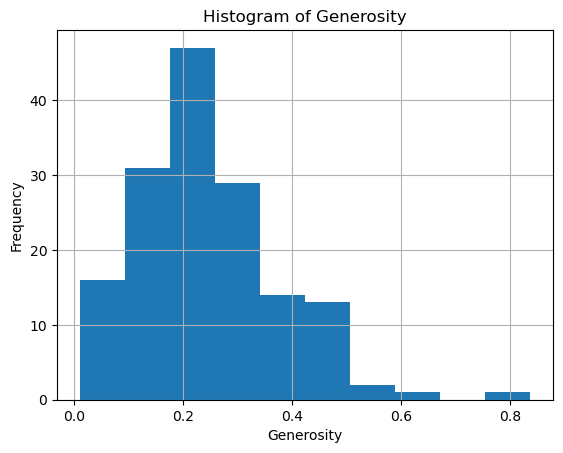

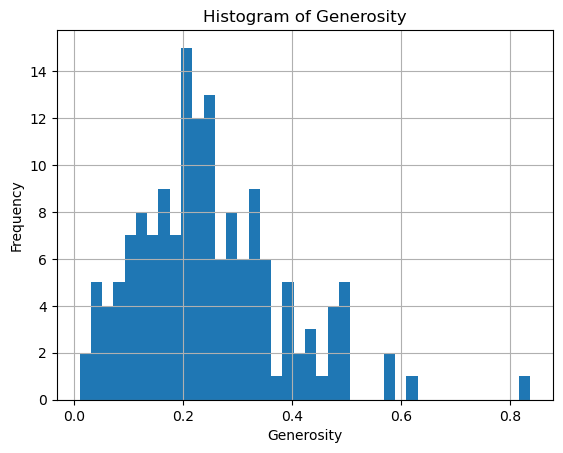

In [364]:
# Normal distribution.
hap1 = Happyness_2017[Happyness_2017["Generosity"] > 0]
plt.hist(hap1["Generosity"], bins=10)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Generosity')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Generosity"], bins=40)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Generosity')
plt.show()


In [365]:
# Min outliers
Happyness_2017[Happyness_2017["Generosity"] <= 0.05].sort_values(by="Generosity", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
101,Tunisia,102,4.805,1.007266,0.868351,0.613212,0.289681,0.049693,0.086723,1.890251,Middle East and Northern Africa
68,Turkey,69,5.500,1.198274,1.337753,0.637606,0.300741,0.046693,0.099672,1.879278,Middle East and Northern Africa
84,Azerbaijan,85,5.234,1.153602,1.152400,0.540776,0.398156,0.045269,0.180988,1.762482,Central and Eastern Europe
117,Gabon,118,4.465,1.198210,1.155620,0.356579,0.312329,0.043785,0.076047,1.322916,Sub-Saharan Africa
83,Morocco,84,5.235,0.878115,0.774864,0.597711,0.408158,0.032210,0.087763,2.456189,Middle East and Northern Africa
78,China,79,5.273,1.081166,1.160837,0.741416,0.472788,0.028807,0.022794,1.764939,Eastern Asia
51,Lithuania,52,5.902,1.314582,1.473516,0.628950,0.234232,0.010165,0.011866,2.228441,Central and Eastern Europe
86,Greece,87,5.227,1.289487,1.239415,0.810199,0.095731,0.000000,0.043290,1.749222,Western Europe


In [366]:
# Top outliers
Happyness_2017[Happyness_2017["Generosity"] >= 0.6].sort_values(by="Generosity", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
113,Myanmar,114,4.545,0.367111,1.123236,0.397523,0.514492,0.838075,0.188816,1.115290,Southeastern Asia
80,Indonesia,81,5.262,0.995539,1.274445,0.492346,0.443323,0.611705,0.015317,1.429477,Southeastern Asia


### Trust (Government Corruption)

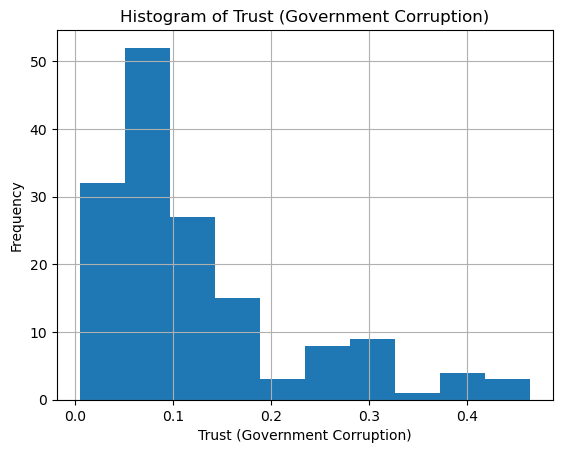

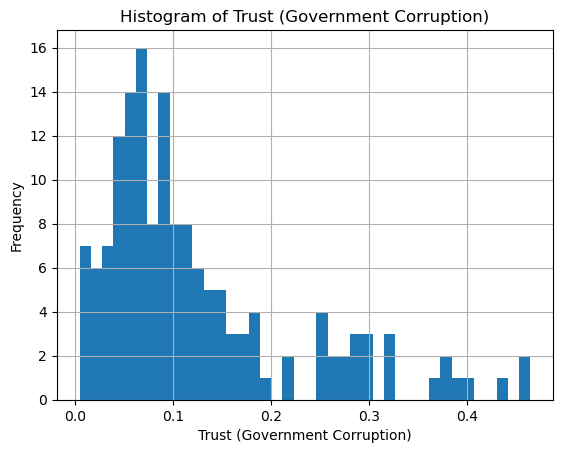

In [367]:
# Normal distribution.
hap1 = Happyness_2017[Happyness_2017["Trust (Government Corruption)"] > 0]
plt.hist(hap1["Trust (Government Corruption)"], bins=10)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Trust (Government Corruption)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Trust (Government Corruption)"], bins=40)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Trust (Government Corruption)')
plt.show()


In [368]:
# Min outliers
Happyness_2017[Happyness_2017["Trust (Government Corruption)"] <= 0.005].sort_values(by="Trust (Government Corruption)", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
56,Romania,57,5.825,1.217684,1.150091,0.685158,0.457004,0.133520,0.004388,2.176831,Central and Eastern Europe
89,Bosnia and Herzegovina,90,5.182,0.982409,1.069336,0.705186,0.204403,0.328867,0.000000,1.892173,Central and Eastern Europe


In [369]:
# Top outliers
Happyness_2017[Happyness_2017["Trust (Government Corruption)"] >= 0.4].sort_values(by="Trust (Government Corruption)", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
25,Singapore,26,6.572,1.692278,1.353814,0.949492,0.549841,0.345966,0.464308,1.216362,Southeastern Asia
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,Sub-Saharan Africa
34,Qatar,35,6.375,1.870766,1.274297,0.710098,0.604131,0.330474,0.439299,1.145464,Middle East and Northern Africa
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe


### Dystopia Residual

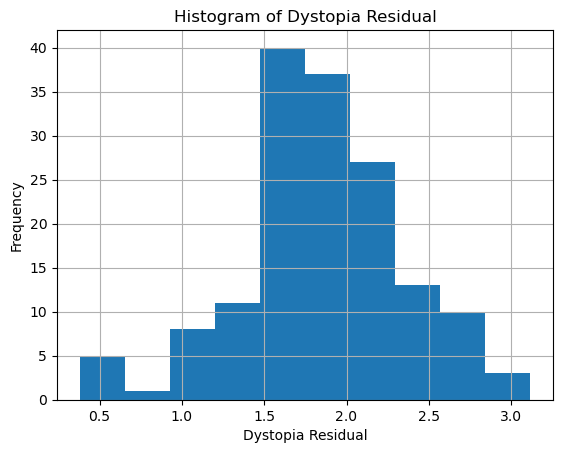

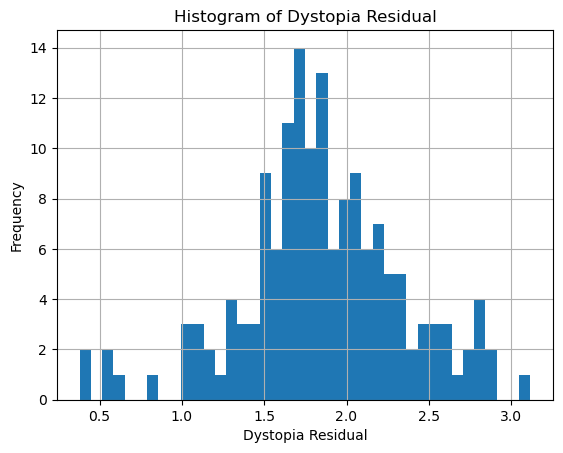

In [370]:
# Normal distribution.
hap1 = Happyness_2017[Happyness_2017["Dystopia Residual"] > 0]
plt.hist(hap1["Dystopia Residual"], bins=10)
plt.xlabel('Dystopia Residual')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Dystopia Residual')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Dystopia Residual"], bins=40)
plt.xlabel('Dystopia Residual')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Dystopia Residual')
plt.show()


In [371]:
# Min outliers
Happyness_2017[Happyness_2017["Dystopia Residual"] <= 1.0].sort_values(by="Dystopia Residual", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
104,Bulgaria,105,4.714,1.161459,1.434379,0.708218,0.289232,0.113178,0.011052,0.996139,Central and Eastern Europe
131,Ukraine,132,4.096,0.894652,1.394538,0.575904,0.122975,0.270061,0.023029,0.814382,Central and Eastern Europe
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,Sub-Saharan Africa
70,"Hong Kong S.A.R., China",71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633,Eastern Asia
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,Sub-Saharan Africa
119,Sri Lanka,120,4.440,1.009850,1.259976,0.625131,0.561213,0.490864,0.073654,0.419389,Southern Asia
141,Botswana,142,3.766,1.122094,1.221555,0.341756,0.505196,0.099348,0.098583,0.377914,Sub-Saharan Africa


In [372]:
# Top outliers
Happyness_2017[Happyness_2017["Dystopia Residual"] >= 3.0].sort_values(by="Dystopia Residual", ascending=False)

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region
92,Somalia,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.28241,3.117485,Sub-Saharan Africa


# View 2018

### Happy Score

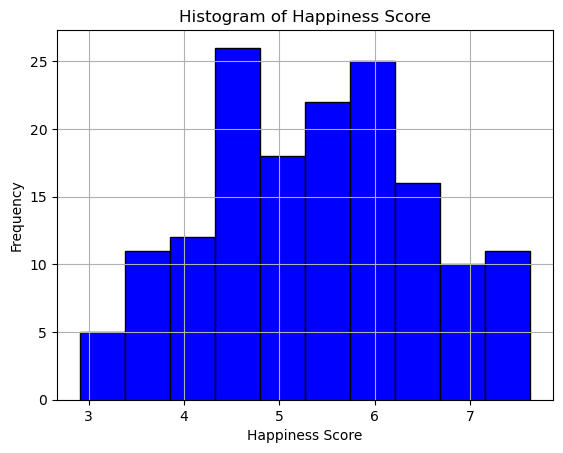

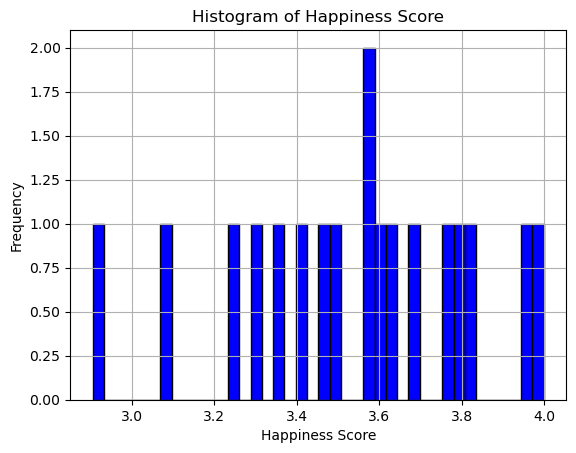

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
146,147,Malawi,3.587,0.186,0.541,0.306,0.531,0.210,0.080,Sub-Saharan Africa,1.733
147,148,Haiti,3.582,0.315,0.714,0.289,0.025,0.392,0.104,Latin America and Caribbean,1.743
148,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030,Sub-Saharan Africa,1.639
149,150,Syria,3.462,0.689,0.382,0.539,0.088,0.376,0.144,Middle East and Northern Africa,1.244
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,Sub-Saharan Africa,0.500
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,Middle East and Northern Africa,1.106
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,Sub-Saharan Africa,0.628
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,Sub-Saharan Africa,1.690
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,Sub-Saharan Africa,2.488
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076,Sub-Saharan Africa,1.752


In [373]:
### View Happy Score

# Normal distribution of Happiness Score
hap1 = Happyness_2018[Happyness_2018["Happiness Score"] > 0]
plt.hist(hap1['Happiness Score'],
         facecolor='b', edgecolor='black',
         bins=10  # bins = 6 means 6 bars
         )

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()

# The distribution of Happiness Score shows there may be outliers in the data (0-4).
# We see this more clearly after using 40 bins.
hap1 = Happyness_2018[Happyness_2018["Happiness Score"] < 4]
plt.hist(hap1['Happiness Score'],
         facecolor='b', edgecolor='black',
         bins=40  # bins = 6 means 6 bars
         )

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()
#We check our data, i see nothing wrong with it. 
#low happy score
Happyness_2018.tail(10)

### Economy (GDP per Capita)

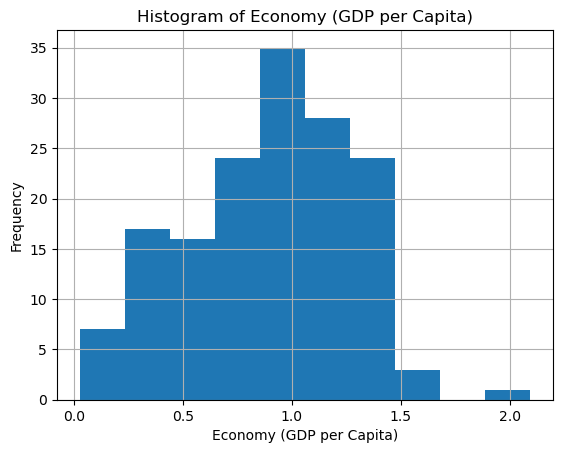

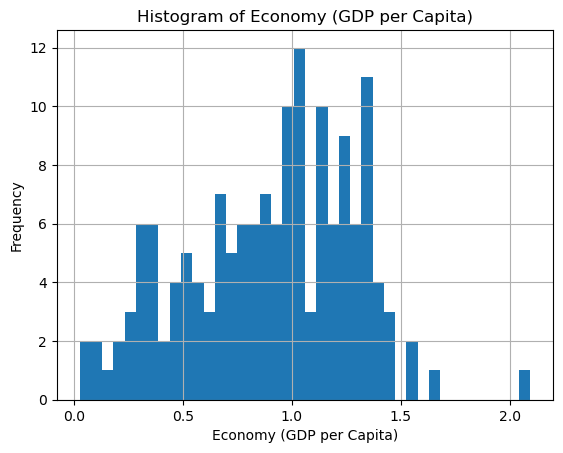

In [374]:
# Normal distribution of Economy (GDP per Capita)
hap1 = Happyness_2018[Happyness_2018["Economy (GDP per Capita)"] > 0]
plt.hist(hap1["Economy (GDP per Capita)"], bins=10)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Economy (GDP per Capita)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Economy (GDP per Capita)"], bins=40)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Economy (GDP per Capita)')
plt.show()


In [375]:
# Min outliers
Happyness_2018[Happyness_2018["Economy (GDP per Capita)"] <= 0.1].sort_values(by="Economy (GDP per Capita)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076,Sub-Saharan Africa,1.752
148,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030,Sub-Saharan Africa,1.639
131,132,Congo (Kinshasa),4.245,0.069,1.136,0.204,0.312,0.197,0.052,Sub-Saharan Africa,2.275
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,Sub-Saharan Africa,2.488
97,98,Somalia,4.982,0.000,0.712,0.115,0.674,0.238,0.282,Sub-Saharan Africa,2.961


In [376]:
# Top outliers
Happyness_2018[Happyness_2018["Economy (GDP per Capita)"] >= 1.5].sort_values(by="Economy (GDP per Capita)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,2.762,Middle East and Northern Africa,0.000
31,32,Qatar,6.374,1.649,1.303,0.748,0.654,0.256,0.171,Middle East and Northern Africa,1.593
16,17,Luxembourg,6.910,1.576,1.520,0.896,0.632,0.196,0.321,Western Europe,1.769
33,34,Singapore,6.343,1.529,1.451,1.008,0.631,0.261,0.457,Southeastern Asia,1.006


### Family

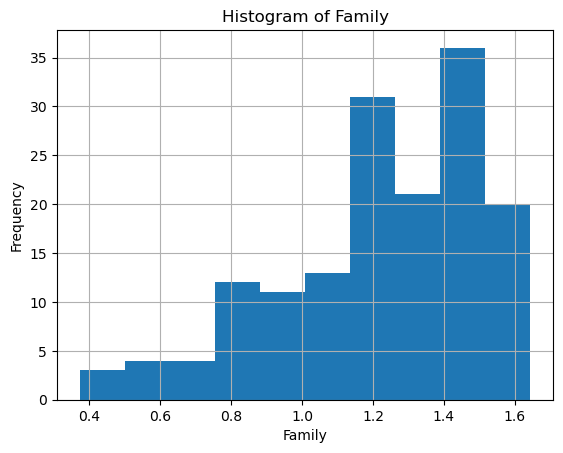

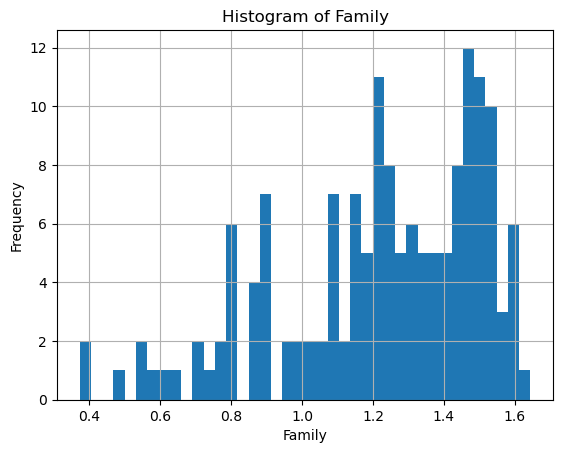

In [377]:
# Normal distribution of Family
hap1 = Happyness_2018[Happyness_2018["Family"] > 0]
plt.hist(hap1["Family"], bins=10)
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Family')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Family"], bins=40)
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Family')
plt.show()


In [378]:
# Min outliers
Happyness_2018[Happyness_2018["Family"] <= 0.1].sort_values(by="Family", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
154,155,Central African Republic,3.083,0.024,0.0,0.01,0.305,0.218,0.038,Sub-Saharan Africa,2.488


In [379]:
# Top outliers
Happyness_2018[Happyness_2018["Family"] >= 1.6].sort_values(by="Family", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe,2.426
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389,Australia and New Zealand,2.156


### Health (Life Expectancy)

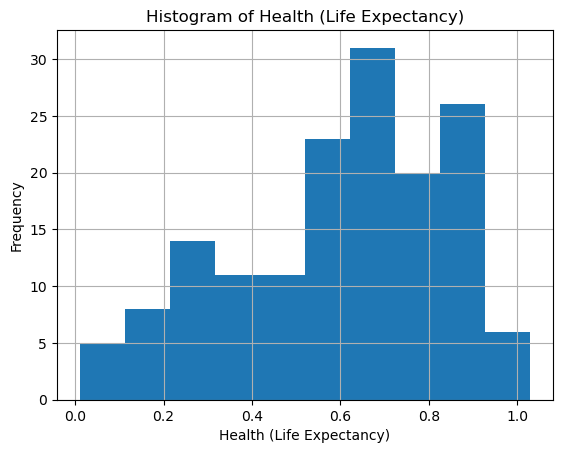

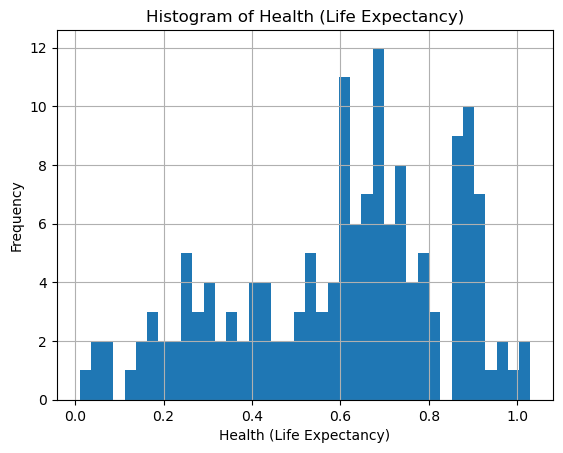

In [380]:
# Normal distribution of Health (Life Expectancy)
hap1 = Happyness_2018[Happyness_2018["Health (Life Expectancy)"] > 0]
plt.hist(hap1["Health (Life Expectancy)"], bins=10)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Health (Life Expectancy)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Health (Life Expectancy)"], bins=40)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Health (Life Expectancy)')
plt.show()


In [381]:
# Min outliers
Happyness_2018[Happyness_2018["Health (Life Expectancy)"] <= 0.1].sort_values(by="Health (Life Expectancy)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
106,107,Ivory Coast,4.671,0.541,0.872,0.080,0.467,0.146,0.103,Sub-Saharan Africa,2.462
140,141,Lesotho,3.808,0.472,1.215,0.079,0.423,0.116,0.112,Sub-Saharan Africa,1.391
130,131,Chad,4.301,0.358,0.907,0.053,0.189,0.181,0.060,Sub-Saharan Africa,2.553
90,91,Nigeria,5.155,0.689,1.172,0.048,0.462,0.201,0.032,Sub-Saharan Africa,2.551
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,Sub-Saharan Africa,2.488
112,113,Sierra Leone,4.571,0.256,0.813,0.000,0.355,0.238,0.053,Sub-Saharan Africa,2.856


In [382]:
# Top outliers
Happyness_2018[Happyness_2018["Health (Life Expectancy)"] >= 0.9].sort_values(by="Health (Life Expectancy)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
75,76,Hong Kong,5.430,1.405,1.290,1.030,0.524,0.246,0.291,Eastern Asia,0.644
33,34,Singapore,6.343,1.529,1.451,1.008,0.631,0.261,0.457,Southeastern Asia,1.006
53,54,Japan,5.915,1.294,1.462,0.988,0.553,0.079,0.150,Eastern Asia,1.389
35,36,Spain,6.310,1.251,1.538,0.965,0.449,0.142,0.074,Western Europe,1.891
56,57,South Korea,5.875,1.266,1.204,0.955,0.244,0.175,0.051,Eastern Asia,1.980
46,47,Italy,6.000,1.264,1.501,0.946,0.281,0.137,0.028,Western Europe,1.843
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Western Europe,2.318
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Western Europe,2.426
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383,Western Europe,2.218
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302,Australia and New Zealand,2.139


### Freedom

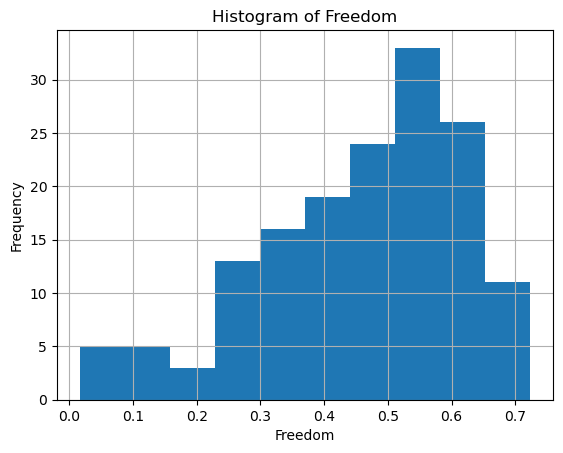

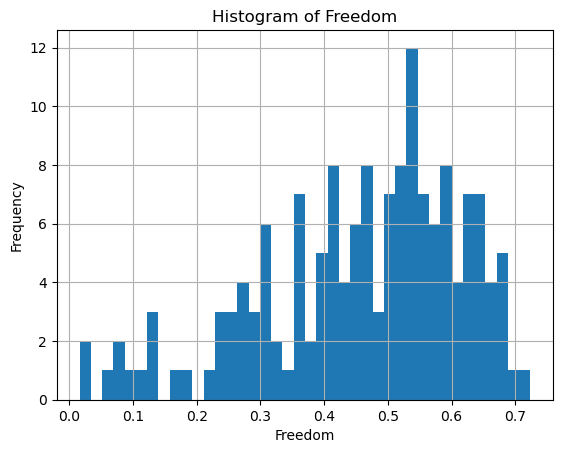

In [383]:
# Normal distribution of Freedom
hap1 = Happyness_2018[Happyness_2018["Freedom"] > 0]
plt.hist(hap1["Freedom"], bins=10)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Freedom')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Freedom"], bins=40)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Freedom')
plt.show()


In [384]:
# Min outliers
Happyness_2018[Happyness_2018["Freedom"] <= 0.1].sort_values(by="Freedom", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
149,150,Syria,3.462,0.689,0.382,0.539,0.088,0.376,0.144,Middle East and Northern Africa,1.244
144,145,Afghanistan,3.632,0.332,0.537,0.255,0.085,0.191,0.036,Southern Asia,2.196
83,84,Algeria,5.295,0.979,1.154,0.687,0.077,0.055,0.135,Middle East and Northern Africa,2.208
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076,Sub-Saharan Africa,1.752
147,148,Haiti,3.582,0.315,0.714,0.289,0.025,0.392,0.104,Latin America and Caribbean,1.743
136,137,Sudan,4.139,0.605,1.240,0.312,0.016,0.134,0.082,Sub-Saharan Africa,1.750
141,142,Angola,3.795,0.730,1.125,0.269,0.000,0.079,0.061,Sub-Saharan Africa,1.531


In [385]:
# Top outliers
Happyness_2018[Happyness_2018["Freedom"] >= 0.7].sort_values(by="Freedom", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
43,44,Uzbekistan,6.096,0.719,1.584,0.605,0.724,0.328,0.259,Central and Eastern Europe,1.877


### Generosity

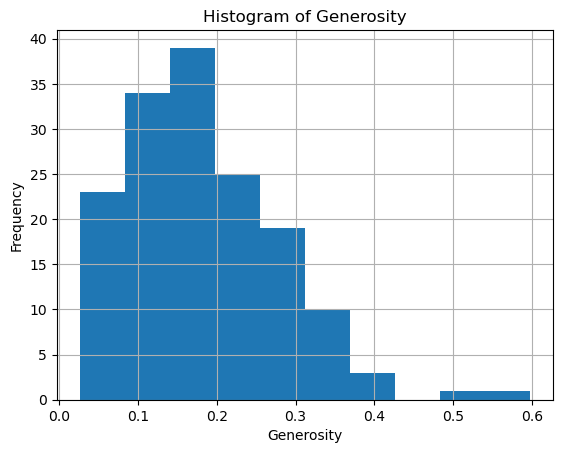

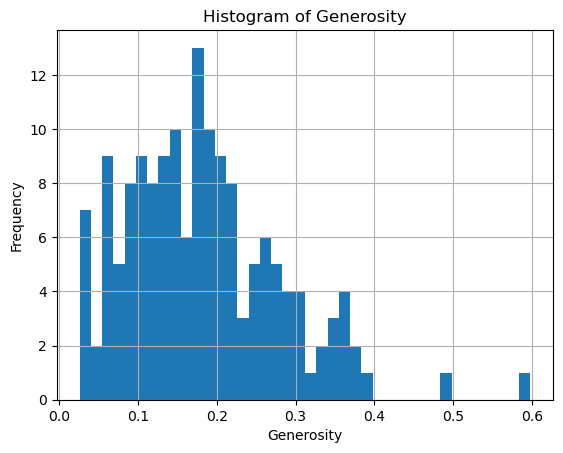

In [386]:
# Normal distribution of Generosity
hap1 = Happyness_2018[Happyness_2018["Generosity"] > 0]
plt.hist(hap1["Generosity"], bins=10)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Generosity')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Generosity"], bins=40)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Generosity')
plt.show()


In [387]:
# Min outliers
Happyness_2018[Happyness_2018["Generosity"] <= 0.05].sort_values(by="Generosity", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
145,146,Botswana,3.590,1.017,1.174,0.417,0.557,0.042,0.092,Sub-Saharan Africa,0.291
110,111,Tunisia,4.592,0.900,0.906,0.690,0.271,0.040,0.063,Middle East and Northern Africa,1.722
127,128,Georgia,4.340,0.853,0.592,0.643,0.375,0.038,0.215,Central and Eastern Europe,1.624
102,103,Gabon,4.758,1.036,1.164,0.404,0.356,0.032,0.052,Sub-Saharan Africa,1.714
86,87,Azerbaijan,5.201,1.024,1.161,0.603,0.430,0.031,0.176,Central and Eastern Europe,1.776
85,86,China,5.246,0.989,1.142,0.799,0.597,0.029,0.103,Eastern Asia,1.587
49,50,Lithuania,5.952,1.197,1.527,0.716,0.350,0.026,0.006,Central and Eastern Europe,2.130
84,85,Morocco,5.254,0.779,0.797,0.669,0.460,0.026,0.074,Middle East and Northern Africa,2.449
78,79,Greece,5.358,1.154,1.202,0.879,0.131,0.000,0.044,Western Europe,1.948


In [388]:
# Top outliers
Happyness_2018[Happyness_2018["Generosity"] >= 0.5].sort_values(by="Generosity", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
129,130,Myanmar,4.308,0.682,1.174,0.429,0.58,0.598,0.178,Southeastern Asia,0.667


### Trust (Government Corruption)

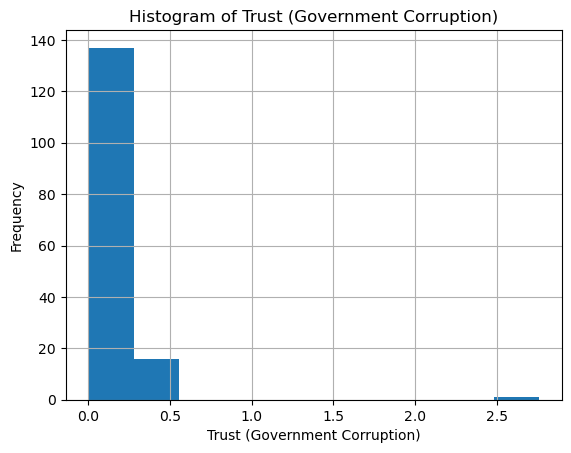

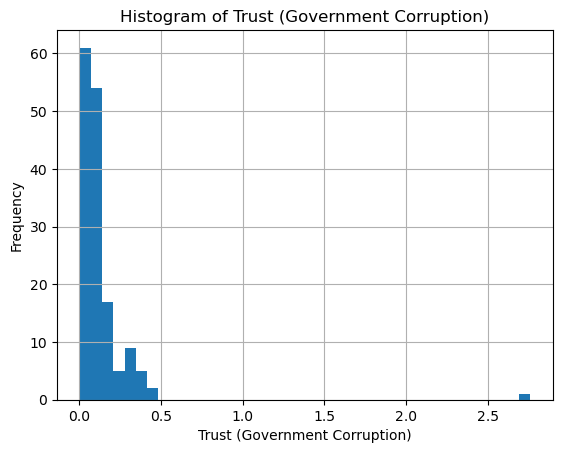

In [389]:
# Normal distribution of Trust (Government Corruption)
hap1 = Happyness_2018[Happyness_2018["Trust (Government Corruption)"] > 0]
plt.hist(hap1["Trust (Government Corruption)"], bins=10)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Trust (Government Corruption)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Trust (Government Corruption)"], bins=40)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Trust (Government Corruption)')
plt.show()


In [390]:
# Min outliers
Happyness_2018[Happyness_2018["Trust (Government Corruption)"] <= 0.01].sort_values(by="Trust (Government Corruption)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
99,100,Bulgaria,4.933,1.054,1.515,0.712,0.359,0.064,0.009,Central and Eastern Europe,1.220
49,50,Lithuania,5.952,1.197,1.527,0.716,0.350,0.026,0.006,Central and Eastern Europe,2.130
51,52,Romania,5.945,1.116,1.219,0.726,0.528,0.088,0.001,Central and Eastern Europe,2.267
66,67,Moldova,5.640,0.657,1.301,0.620,0.232,0.171,0.000,Central and Eastern Europe,2.659
92,93,Bosnia and Herzegovina,5.129,0.915,1.078,0.758,0.280,0.216,0.000,Central and Eastern Europe,1.882


In [391]:
# Top outliers
Happyness_2018[Happyness_2018["Trust (Government Corruption)"] >= 0.4].sort_values(by="Trust (Government Corruption)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,2.762,Middle East and Northern Africa,0.000
33,34,Singapore,6.343,1.529,1.451,1.008,0.631,0.261,0.457,Southeastern Asia,1.006
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,Sub-Saharan Africa,0.500
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Western Europe,2.371


### Dystopia.Residual

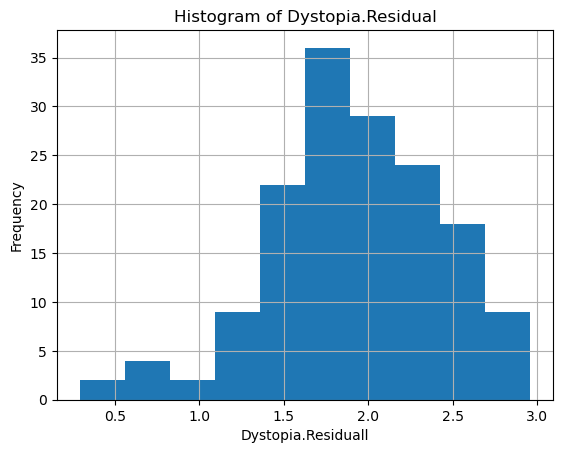

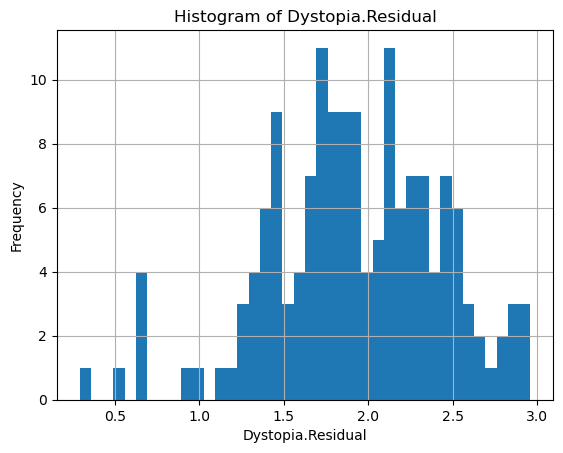

In [392]:
# Normal distribution of Dystopia.Residuall
hap1 = Happyness_2018[Happyness_2018["Dystopia.Residual"] > 0]
plt.hist(hap1["Dystopia.Residual"], bins=10)
plt.xlabel('Dystopia.Residuall')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Dystopia.Residual')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Dystopia.Residual"], bins=40)
plt.xlabel('Dystopia.Residual')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Dystopia.Residual')
plt.show()

In [393]:
# Min outliers
Happyness_2018[Happyness_2018["Dystopia.Residual"] <= 1.0].sort_values(by="Dystopia.Residual", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
137,138,Ukraine,4.103,0.793,1.413,0.609,0.163,0.187,0.011,Central and Eastern Europe,0.927
129,130,Myanmar,4.308,0.682,1.174,0.429,0.580,0.598,0.178,Southeastern Asia,0.667
75,76,Hong Kong,5.430,1.405,1.290,1.030,0.524,0.246,0.291,Eastern Asia,0.644
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,Sub-Saharan Africa,0.628
115,116,Sri Lanka,4.471,0.918,1.314,0.672,0.585,0.307,0.050,Southern Asia,0.625
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,Sub-Saharan Africa,0.500
145,146,Botswana,3.590,1.017,1.174,0.417,0.557,0.042,0.092,Sub-Saharan Africa,0.291
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,2.762,Middle East and Northern Africa,0.000


In [394]:
# Top outliers
Happyness_2018[Happyness_2018["Dystopia.Residual"] >= 2.8].sort_values(by="Dystopia.Residual", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
97,98,Somalia,4.982,0.000,0.712,0.115,0.674,0.238,0.282,Sub-Saharan Africa,2.961
74,75,Pakistan,5.472,0.652,0.810,0.424,0.334,0.216,0.113,Southern Asia,2.923
12,13,Costa Rica,7.072,1.010,1.459,0.817,0.632,0.143,0.101,Latin America and Caribbean,2.910
39,40,El Salvador,6.167,0.806,1.231,0.639,0.461,0.065,0.082,Latin America and Caribbean,2.883
29,30,Guatemala,6.382,0.781,1.268,0.608,0.604,0.179,0.071,Latin America and Caribbean,2.871
112,113,Sierra Leone,4.571,0.256,0.813,0.000,0.355,0.238,0.053,Sub-Saharan Africa,2.856
10,11,United Kingdom,7.190,1.244,1.433,0.888,0.464,0.262,0.082,Western Europe,2.817


# View 2019

### Happy Score

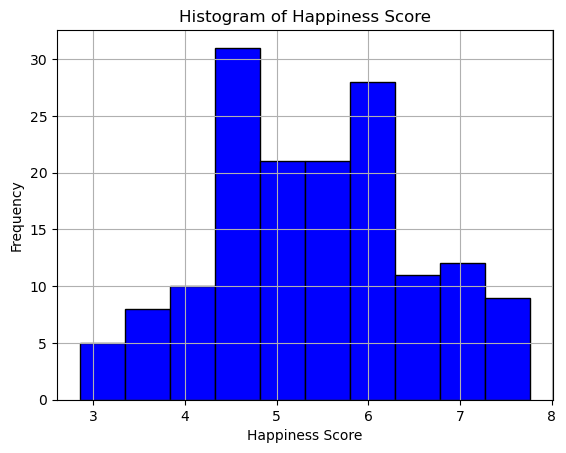

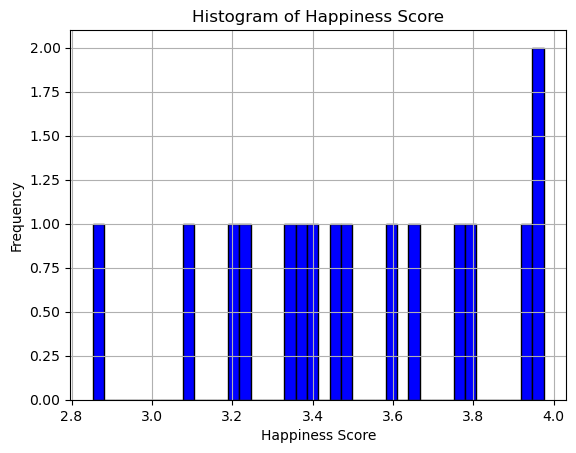

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
146,147,Malawi,3.587,0.186,0.541,0.306,0.531,0.210,0.080,Sub-Saharan Africa,1.733
147,148,Haiti,3.582,0.315,0.714,0.289,0.025,0.392,0.104,Latin America and Caribbean,1.743
148,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030,Sub-Saharan Africa,1.639
149,150,Syria,3.462,0.689,0.382,0.539,0.088,0.376,0.144,Middle East and Northern Africa,1.244
150,151,Rwanda,3.408,0.332,0.896,0.400,0.636,0.200,0.444,Sub-Saharan Africa,0.500
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064,Middle East and Northern Africa,1.106
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097,Sub-Saharan Africa,0.628
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106,Sub-Saharan Africa,1.690
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038,Sub-Saharan Africa,2.488
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076,Sub-Saharan Africa,1.752


In [395]:
### View Happy Score

# Normal distribution of Happiness Score
hap1 = Happyness_2019[Happyness_2019["Happiness Score"] > 0]
plt.hist(hap1['Happiness Score'],
         facecolor='b', edgecolor='black',
         bins=10  # bins = 6 means 6 bars
         )

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()

# The distribution of Happiness Score shows there may be outliers in the data (0-4).
# We see this more clearly after using 40 bins.
hap1 = Happyness_2019[Happyness_2019["Happiness Score"] < 4]
plt.hist(hap1['Happiness Score'],
         facecolor='b', edgecolor='black',
         bins=40  # bins = 6 means 6 bars
         )

plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Histogram of Happiness Score')
plt.show()
#We check our data, i see nothing wrong with it. 
#low happy score
Happyness_2018.tail(10)

### Economy (GDP per Capita)

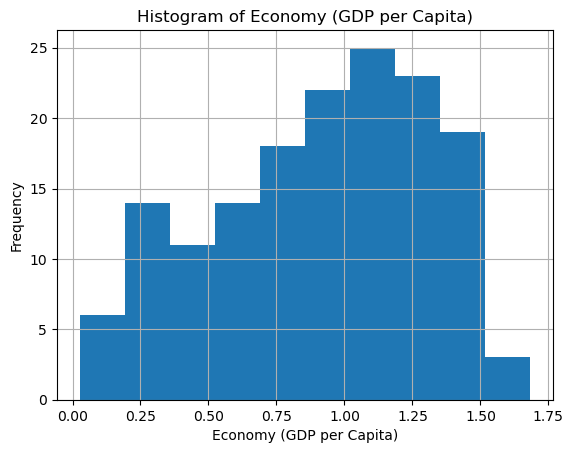

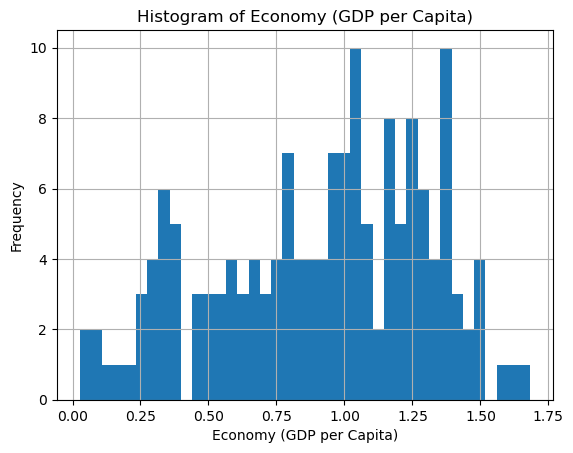

In [396]:
# Normal distribution of Economy (GDP per Capita)
hap1 = Happyness_2019[Happyness_2019["Economy (GDP per Capita)"] > 0]
plt.hist(hap1["Economy (GDP per Capita)"], bins=10)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Economy (GDP per Capita)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Economy (GDP per Capita)"], bins=40)
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Economy (GDP per Capita)')
plt.show()


In [397]:
# Min outliers
Happyness_2019[Happyness_2019["Economy (GDP per Capita)"] <= 0.1].sort_values(by="Economy (GDP per Capita)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
126,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053,Sub-Saharan Africa,2.308
140,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,Sub-Saharan Africa,1.901
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180,Sub-Saharan Africa,2.326
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Sub-Saharan Africa,2.457
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270,Sub-Saharan Africa,2.630


In [398]:
# Top outliers
Happyness_2019[Happyness_2019["Economy (GDP per Capita)"] >= 1.5].sort_values(by="Economy (GDP per Capita)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167,Middle East and Northern Africa,1.564
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316,Western Europe,1.954
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453,Southeastern Asia,0.806
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,Middle East and Northern Africa,2.145
50,51,Kuwait,6.021,1.500,1.319,0.808,0.493,0.142,0.097,Middle East and Northern Africa,1.662


### Family

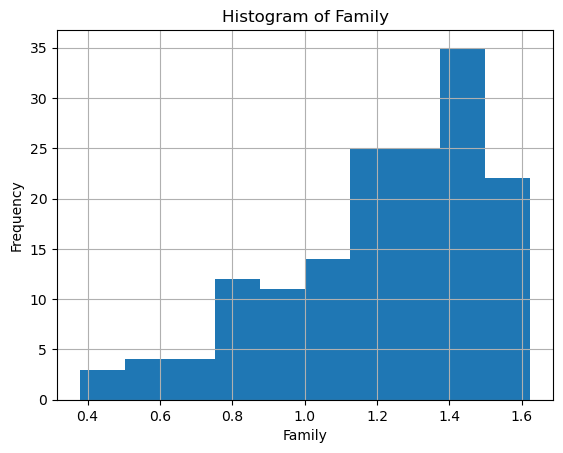

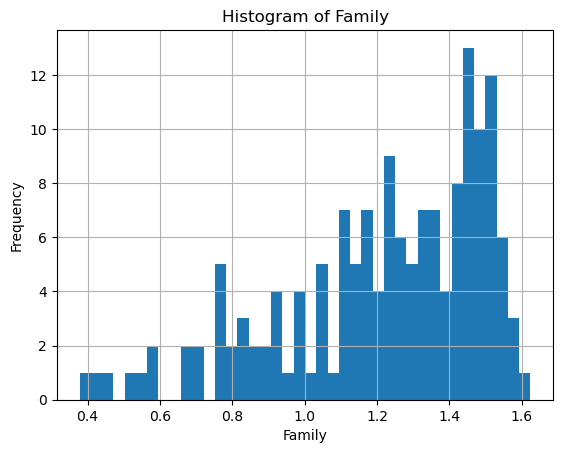

In [399]:
# Normal distribution of Family
hap1 = Happyness_2019[Happyness_2019["Family"] > 0]
plt.hist(hap1["Family"], bins=10)
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Family')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Family"], bins=40)
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Family')
plt.show()



In [400]:
# Min outliers
Happyness_2019[Happyness_2019["Family"] <= 0.1].sort_values(by="Family", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
154,155,Central African Republic,3.083,0.026,0.0,0.105,0.225,0.235,0.035,Sub-Saharan Africa,2.457


In [401]:
# Top outliers
Happyness_2019[Happyness_2019["Family"] >= 1.6].sort_values(by="Family", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
3,4,Iceland,7.494,1.38,1.624,1.026,0.591,0.354,0.118,Western Europe,2.401


### Health (Life Expectancy)	

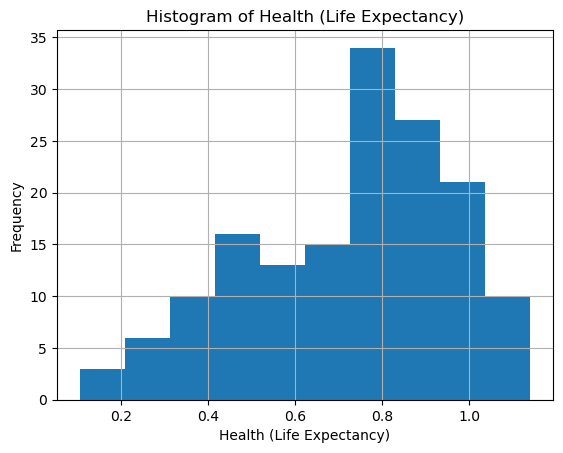

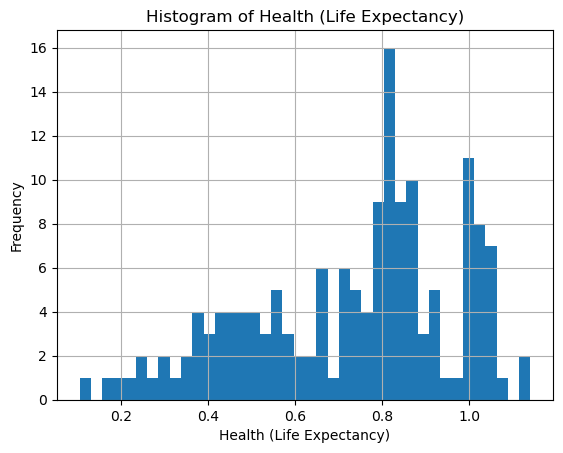

In [402]:
# Normal distribution of Health (Life Expectancy)
hap1 = Happyness_2019[Happyness_2019["Health (Life Expectancy)"] > 0]
plt.hist(hap1["Health (Life Expectancy)"], bins=10)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Health (Life Expectancy)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Health (Life Expectancy)"], bins=40)
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Health (Life Expectancy)')
plt.show()


In [403]:
# Min outliers
Happyness_2019[Happyness_2019["Health (Life Expectancy)"] <= 0.2].sort_values(by="Health (Life Expectancy)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
131,132,Chad,4.350,0.350,0.766,0.192,0.174,0.198,0.078,Sub-Saharan Africa,2.592
143,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,Sub-Saharan Africa,1.417
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,Sub-Saharan Africa,2.457
134,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,Sub-Saharan Africa,1.730


In [404]:
# Top outliers
Happyness_2019[Happyness_2019["Health (Life Expectancy)"] >= 1.05].sort_values(by="Health (Life Expectancy)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453,Southeastern Asia,0.806
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287,Eastern Asia,0.608
57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140,Eastern Asia,1.398
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079,Western Europe,1.928
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,Western Europe,2.272


### Freedom

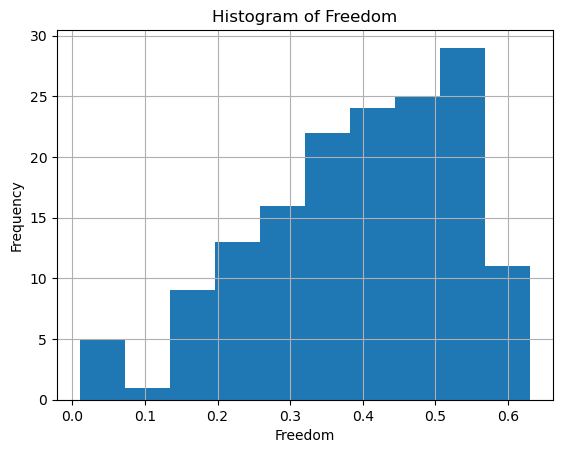

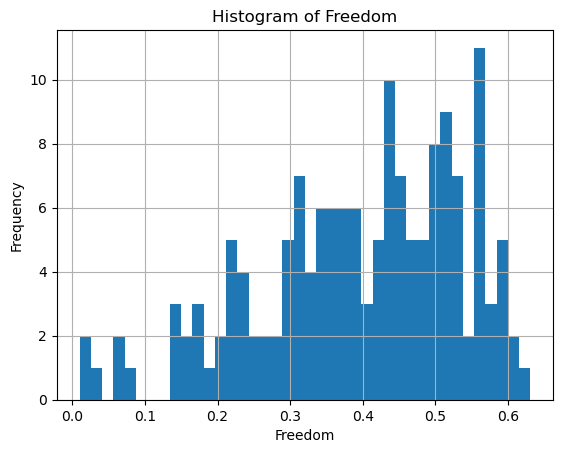

In [405]:
# Normal distribution of Freedom
hap1 = Happyness_2019[Happyness_2019["Freedom"] > 0]
plt.hist(hap1["Freedom"], bins=10)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Freedom')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Freedom"], bins=40)
plt.xlabel('Freedom')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Freedom')
plt.show()


In [406]:
# Min outliers
Happyness_2019[Happyness_2019["Freedom"] <= 0.1].sort_values(by="Freedom", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
87,88,Algeria,5.211,1.002,1.160,0.785,0.086,0.073,0.114,Middle East and Northern Africa,1.991
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034,Western Europe,1.850
121,122,Mauritania,4.490,0.570,1.167,0.489,0.066,0.106,0.088,Sub-Saharan Africa,2.004
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,Latin America and Caribbean,1.582
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141,Middle East and Northern Africa,1.540
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,Sub-Saharan Africa,1.374
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,Southern Asia,1.792


In [407]:
# Top outliers
Happyness_2019[Happyness_2019["Freedom"] >= 0.6].sort_values(by="Freedom", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
40,41,Uzbekistan,6.174,0.745,1.529,0.756,0.631,0.322,0.240,Central and Eastern Europe,1.951
108,109,Cambodia,4.700,0.574,1.122,0.637,0.609,0.232,0.062,Southeastern Asia,1.464
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe,2.241


### Generosity

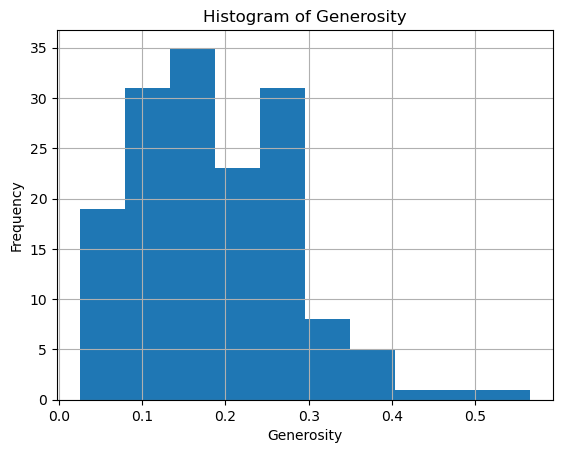

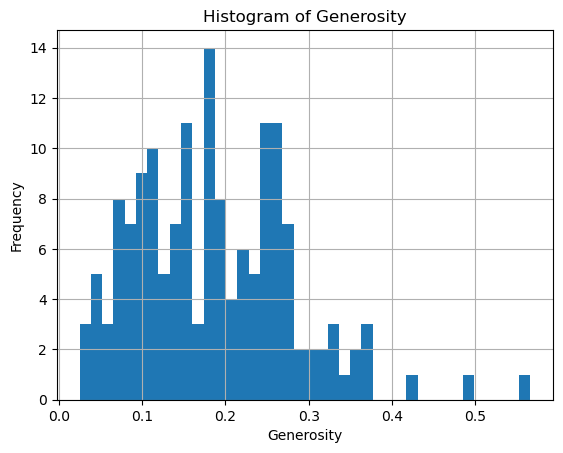

In [408]:
# Normal distribution of Generosity
hap1 = Happyness_2019[Happyness_2019["Generosity"] > 0]
plt.hist(hap1["Generosity"], bins=10)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Generosity')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Generosity"], bins=40)
plt.xlabel('Generosity')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Generosity')
plt.show()


In [409]:
# Min outliers
Happyness_2019[Happyness_2019["Generosity"] <= 0.06].sort_values(by="Generosity", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
123,124,Tunisia,4.461,0.921,1.000,0.815,0.167,0.059,0.055,Middle East and Northern Africa,1.444
92,93,China,5.191,1.029,1.125,0.893,0.521,0.058,0.100,Eastern Asia,1.465
65,66,Portugal,5.693,1.221,1.431,0.999,0.508,0.047,0.025,Western Europe,1.462
19,20,Czech Republic,6.852,1.269,1.487,0.920,0.457,0.046,0.036,Central and Eastern Europe,2.637
41,42,Lithuania,6.149,1.238,1.515,0.818,0.291,0.043,0.042,Central and Eastern Europe,2.202
103,104,Gabon,4.799,1.057,1.183,0.571,0.295,0.043,0.055,Sub-Saharan Africa,1.595
118,119,Georgia,4.519,0.886,0.666,0.752,0.346,0.043,0.164,Central and Eastern Europe,1.662
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076,Middle East and Northern Africa,2.313
89,90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182,Central and Eastern Europe,1.681
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100,Sub-Saharan Africa,0.184


In [410]:
# Top outliers
Happyness_2019[Happyness_2019["Generosity"] >= 0.4].sort_values(by="Generosity", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172,Southeastern Asia,0.651
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028,Southeastern Asia,1.381
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,Latin America and Caribbean,1.582


### Trust (Government Corruption)	

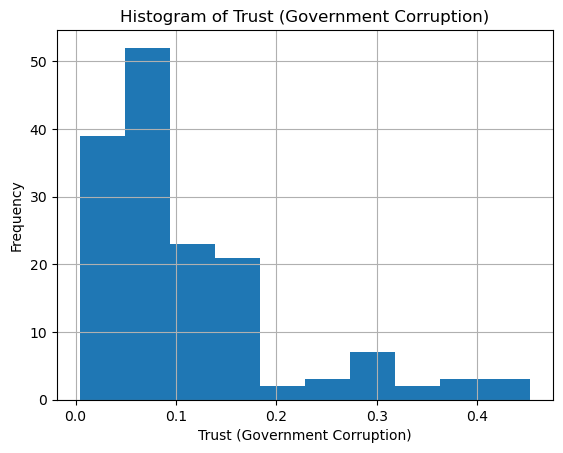

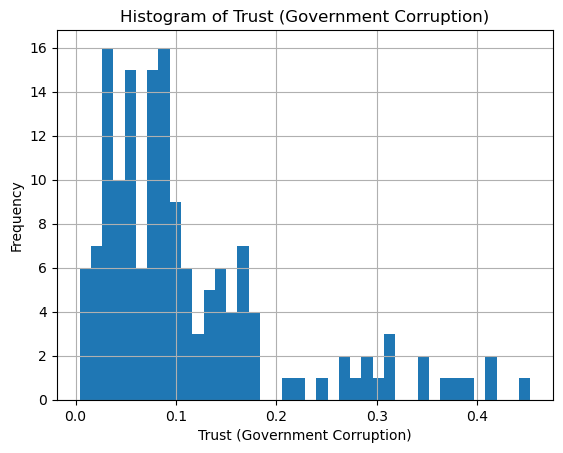

In [411]:
# Normal distribution of Trust (Government Corruption)
hap1 = Happyness_2019[Happyness_2019["Trust (Government Corruption)"] > 0]
plt.hist(hap1["Trust (Government Corruption)"], bins=10)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Trust (Government Corruption)')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Trust (Government Corruption)"], bins=40)
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Trust (Government Corruption)')
plt.show()

In [412]:
# Min outliers
Happyness_2019[Happyness_2019["Trust (Government Corruption)"] <= 0.01].sort_values(by="Trust (Government Corruption)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
132,133,Ukraine,4.332,0.820,1.390,0.739,0.178,0.187,0.010,Central and Eastern Europe,1.008
45,46,Kosovo,6.100,0.882,1.232,0.758,0.489,0.262,0.006,Central and Eastern Europe,2.471
77,78,Bosnia and Herzegovina,5.386,0.945,1.212,0.845,0.212,0.263,0.006,Central and Eastern Europe,1.903
47,48,Romania,6.070,1.162,1.232,0.825,0.462,0.083,0.005,Central and Eastern Europe,2.301
96,97,Bulgaria,5.011,1.092,1.513,0.815,0.311,0.081,0.004,Central and Eastern Europe,1.195
70,71,Moldova,5.529,0.685,1.328,0.739,0.245,0.181,0.000,Central and Eastern Europe,2.351


In [413]:
# Top outliers
Happyness_2019[Happyness_2019["Trust (Government Corruption)"] >= 0.4].sort_values(by="Trust (Government Corruption)", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453,Southeastern Asia,0.806
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa,0.467
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe,2.394


### Dystopia Residual 

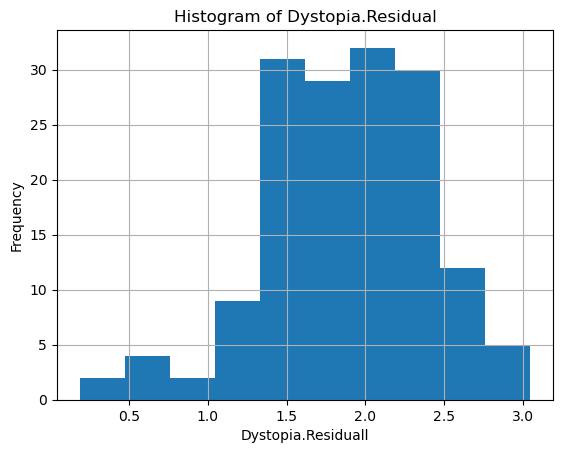

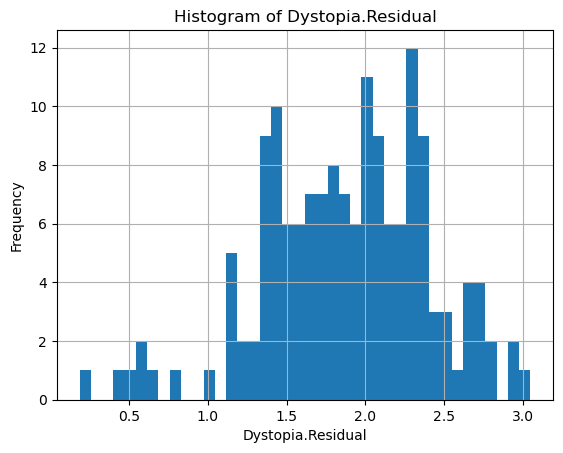

In [414]:
# Normal distribution of Dystopia.Residuall
hap1 = Happyness_2019[Happyness_2019["Dystopia.Residual"] > 0]
plt.hist(hap1["Dystopia.Residual"], bins=10)
plt.xlabel('Dystopia.Residuall')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Dystopia.Residual')
plt.show()

# Not a normal distribution.
plt.hist(hap1["Dystopia.Residual"], bins=40)
plt.xlabel('Dystopia.Residual')
plt.ylabel('Frequency')
plt.grid()
plt.title('Histogram of Dystopia.Residual')
plt.show()


In [415]:
# Min outliers
Happyness_2019[Happyness_2019["Dystopia.Residual"] <= 1.0].sort_values(by="Dystopia.Residual", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453,Southeastern Asia,0.806
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172,Southeastern Asia,0.651
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287,Eastern Asia,0.608
129,130,Sri Lanka,4.366,0.949,1.265,0.831,0.470,0.244,0.047,Southern Asia,0.560
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,Sub-Saharan Africa,0.531
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,Sub-Saharan Africa,0.467
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100,Sub-Saharan Africa,0.184


In [416]:
# Top outliers
Happyness_2019[Happyness_2019["Dystopia.Residual"] >= 3.0].sort_values(by="Dystopia.Residual", ascending=False)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual
101,102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082,Sub-Saharan Africa,3.05


In [417]:
# we see that we have maybe 10-20 outlier from all our data set

# Statistic

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [418]:
Happyness_2015.describe().T

,count,mean,std,min,25%,50%,75%,max
Happiness Rank,158.0,79.493671,45.754363,1.00000,40.250000,79.500000,118.750000,158.00000
Happiness Score,158.0,5.375734,1.145010,2.83900,4.526000,5.232500,6.243750,7.58700
Economy (GDP per Capita),158.0,0.846137,0.403121,0.00000,0.545808,0.910245,1.158448,1.69042
Family,158.0,0.991046,0.272369,0.00000,0.856823,1.029510,1.214405,1.40223
Health (Life Expectancy),158.0,0.630259,0.247078,0.00000,0.439185,0.696705,0.811013,1.02525
Freedom,158.0,0.428615,0.150693,0.00000,0.328330,0.435515,0.549092,0.66973
Trust (Government Corruption),158.0,0.143422,0.120034,0.00000,0.061675,0.107220,0.180255,0.55191
Generosity,158.0,0.237296,0.126685,0.00000,0.150553,0.216130,0.309883,0.79588
Dystopia Residual,158.0,2.098977,0.553550,0.32858,1.759410,2.095415,2.462415,3.60214


In [419]:
# Calculate measures of central tendency
mean_score = Happyness_2015['Happiness Score'].mean()
median_score = Happyness_2015['Happiness Score'].median()
mode_score = Happyness_2015['Happiness Score'].mode()[0]

# Calculate measures of variability
range_score = Happyness_2015['Happiness Score'].max() - Happyness_2015['Happiness Score'].min()
std_score = Happyness_2015['Happiness Score'].std()

# Calculate shape (skewness and kurtosis)
skewness_score = Happyness_2015['Happiness Score'].skew()
kurtosis_score = Happyness_2015['Happiness Score'].kurtosis()

# Print results
print(f"Measures of Central Tendency:")
print(f"Mean: {mean_score:.2f}")
print(f"Median: {median_score:.2f}")
print(f"Mode: {mode_score:.2f}\n")

print(f"Measures of Variability:")
print(f"Range: {range_score:.2f}")
print(f"Standard Deviation: {std_score:.2f}\n")

print(f"Shape of Data:")
print(f"Skewness: {skewness_score:.2f}")
print(f"Kurtosis: {kurtosis_score:.2f}")

Measures of Central Tendency:
Mean: 5.38
Median: 5.23
Mode: 5.19

Measures of Variability:
Range: 4.75
Standard Deviation: 1.15

Shape of Data:
Skewness: 0.10
Kurtosis: -0.78


In [420]:
# we have a postive skewness.

## For 2015 we use (Happy Score), because is the importent column we have.

In [421]:
Happyness_2015["Happiness Score"].describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

In [422]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
speed_Q1 = Happyness_2015["Happiness Score"].quantile(0.25)
speed_Q3 = Happyness_2015["Happiness Score"].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
speed_IQR = speed_Q3 - speed_Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

# # Filter out outliers
x= Happyness_2015[(Happyness_2015["Happiness Score"] < speed_lower_bound) | (Happyness_2015["Happiness Score"] > speed_upper_bound)]
x.shape
#we don't have outliers

(0, 11)

In [423]:
#we don't have outliers

## For 2016 we use (Happy Score), because is the importent column we have.

In [424]:
Happyness_2016["Happiness Score"].describe()

count    157.000000
mean       5.382185
std        1.141674
min        2.905000
25%        4.404000
50%        5.314000
75%        6.269000
max        7.526000
Name: Happiness Score, dtype: float64

In [425]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
speed_Q1 = Happyness_2016["Happiness Score"].quantile(0.25)
speed_Q3 = Happyness_2016["Happiness Score"].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
speed_IQR = speed_Q3 - speed_Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

# # Filter out outliers
Happyness_2016[(Happyness_2016["Happiness Score"] < speed_lower_bound) | (Happyness_2016["Happiness Score"] > speed_upper_bound)]

#we don't have outliers

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


## For 2017 we use (Happy Score), because is the importent column we have.

In [426]:
Happyness_2017["Happiness Score"].describe()

count    155.000000
mean       5.354019
std        1.131230
min        2.693000
25%        4.505500
50%        5.279000
75%        6.101500
max        7.537000
Name: Happiness Score, dtype: float64

In [427]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
speed_Q1 = Happyness_2017["Happiness Score"].quantile(0.25)
speed_Q3 = Happyness_2017["Happiness Score"].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
speed_IQR = speed_Q3 - speed_Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

# # Filter out outliers
Happyness_2017[(Happyness_2017["Happiness Score"] < speed_lower_bound) | (Happyness_2017["Happiness Score"] > speed_upper_bound)]

#we don't have outliers

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Region


## For 2018 we use (Happy Score), because is the importent column we have.

In [428]:
Happyness_2018["Happiness Score"].describe()

count    156.000000
mean       5.375917
std        1.119506
min        2.905000
25%        4.453750
50%        5.378000
75%        6.168500
max        7.632000
Name: Happiness Score, dtype: float64

In [429]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
speed_Q1 = Happyness_2018["Happiness Score"].quantile(0.25)
speed_Q3 = Happyness_2018["Happiness Score"].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
speed_IQR = speed_Q3 - speed_Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

# # Filter out outliers
Happyness_2018[(Happyness_2018["Happiness Score"] < speed_lower_bound) | (Happyness_2018["Happiness Score"] > speed_upper_bound)]

#we don't have outliers

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual


## For 2019 we use (Happy Score), because is the importent column we have.

In [430]:
Happyness_2019["Happiness Score"].describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Happiness Score, dtype: float64

In [431]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
speed_Q1 = Happyness_2019["Happiness Score"].quantile(0.25)
speed_Q3 = Happyness_2019["Happiness Score"].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
speed_IQR = speed_Q3 - speed_Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

# # Filter out outliers
Happyness_2019[(Happyness_2019["Happiness Score"] < speed_lower_bound) | (Happyness_2019["Happiness Score"] > speed_upper_bound)]

#we don't have outliers
#all our score happyiness have a positive skewed  

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Region,Dystopia.Residual


In [432]:
#all our score happyiness have a positive skewed  

In [433]:
# Calculate (5th percentile) and (95th percentile)
#speed_5 = marathon_df_2022['Speed (Km/Hr)'].quantile(0.05)
#speed_95 = marathon_df_2022['Speed (Km/Hr)'].quantile(0.95)
#print(speed_5, speed_95)
# Filter out outliers
#marathon_df_2022[(marathon_df_2022['Speed (Km/Hr)'] < speed_5) | (marathon_df_2022['Speed (Km/Hr)'] > speed_95)].shape

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

# Q1

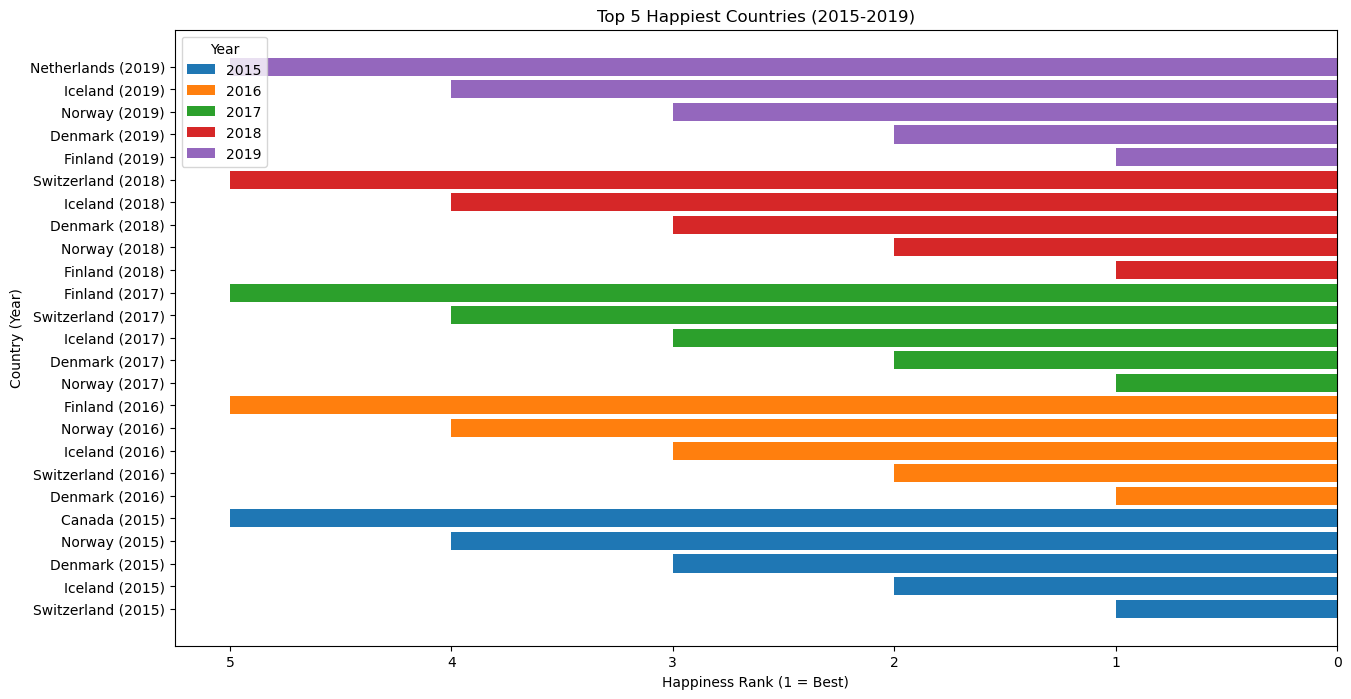

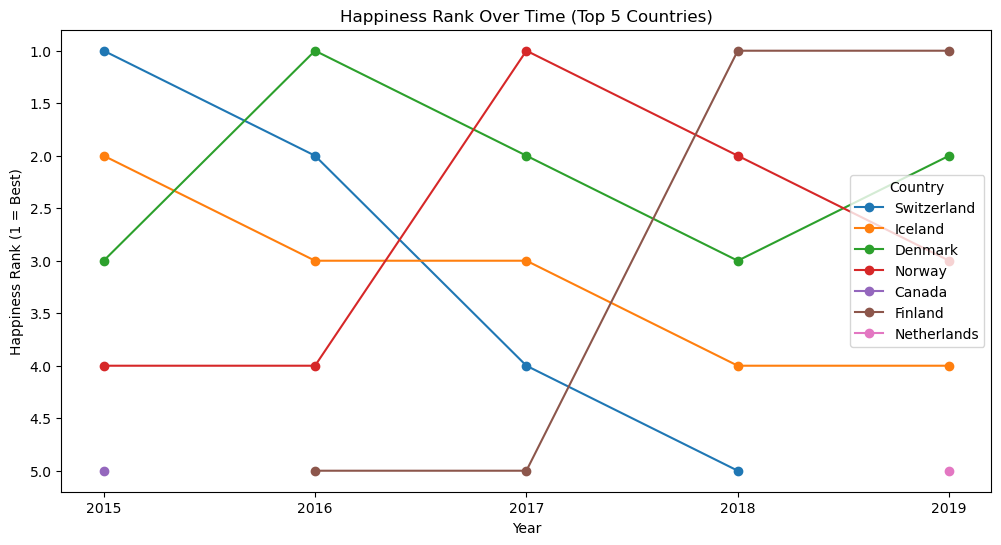

In [434]:
#Q1
top_5_combined = pd.concat([
    Happyness_2015.sort_values("Happiness Rank").head(5).assign(Year="2015"),
    Happyness_2016.sort_values("Happiness Rank").head(5).assign(Year="2016"),
    Happyness_2017.sort_values("Happiness Rank").head(5).assign(Year="2017"),
    Happyness_2018.sort_values("Happiness Rank").head(5).assign(Year="2018"),
    Happyness_2019.sort_values("Happiness Rank").head(5).assign(Year="2019")
])

# Plot all top 5 happiest countries on a single horizontal bar chart
plt.figure(figsize=(15, 8))
for year in top_5_combined['Year'].unique():
    subset = top_5_combined[top_5_combined['Year'] == year]
    plt.barh(subset['Country'] + " (" + subset['Year'] + ")", subset['Happiness Rank'], label=year)

plt.gca().invert_xaxis()  # Invert x-axis so rank 1 is on the left
plt.ylabel("Country (Year)")
plt.xlabel("Happiness Rank (1 = Best)")
plt.title("Top 5 Happiest Countries (2015-2019)")
plt.legend(title="Year")
plt.show()



#Q1
plt.figure(figsize=(12, 6))
for country in top_5_combined['Country'].unique():
    subset = top_5_combined[top_5_combined['Country'] == country]
    plt.plot(subset['Year'], subset['Happiness Rank'], marker='o', label=country)

plt.gca().invert_yaxis()  
plt.xlabel("Year")
plt.ylabel("Happiness Rank (1 = Best)")
plt.title("Happiness Rank Over Time (Top 5 Countries)")
plt.legend(title="Country")
plt.show()


# Q2

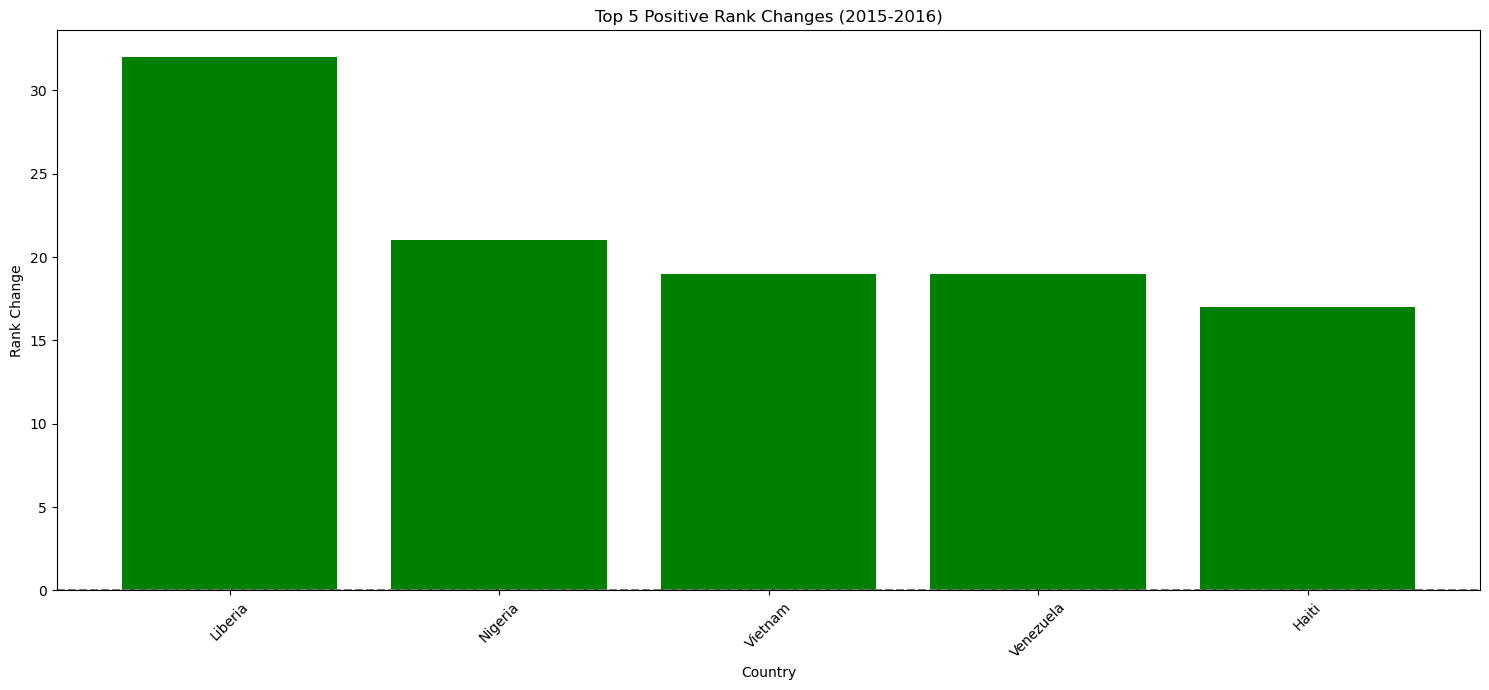

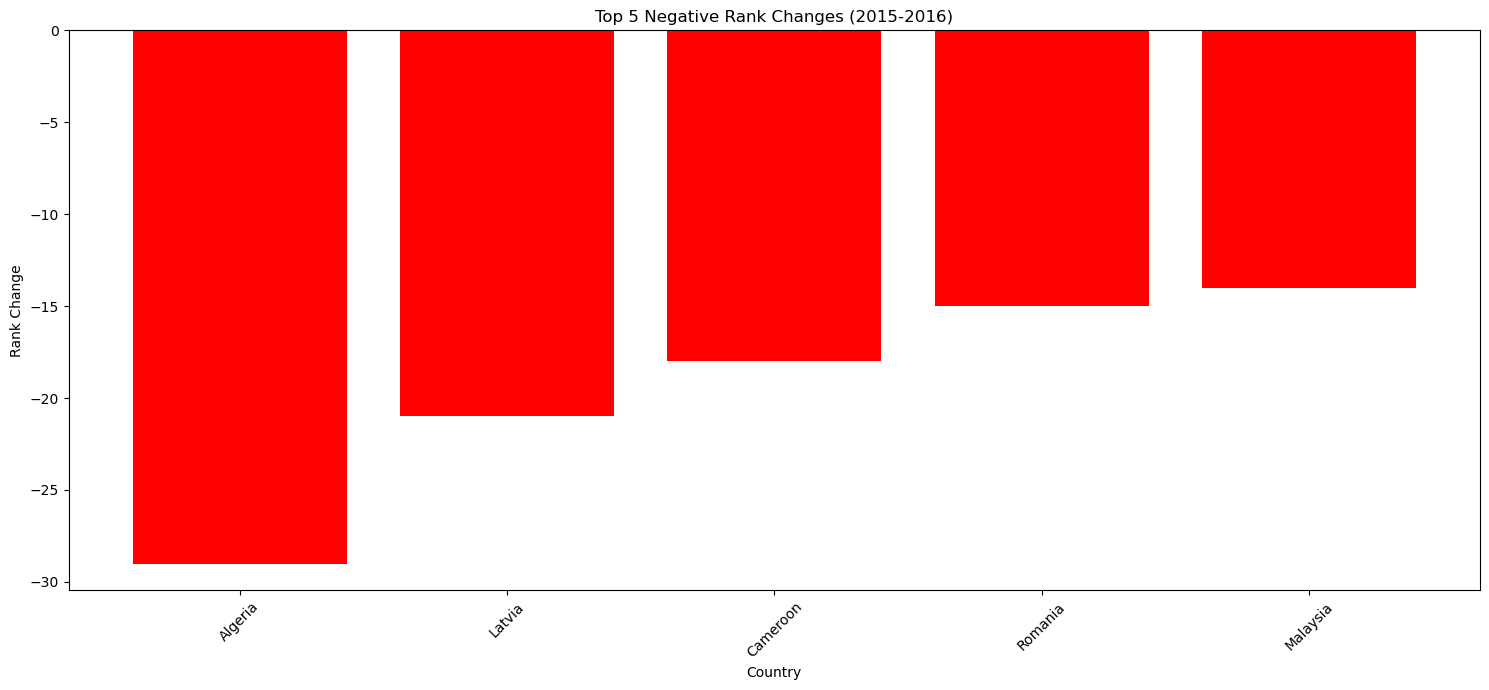

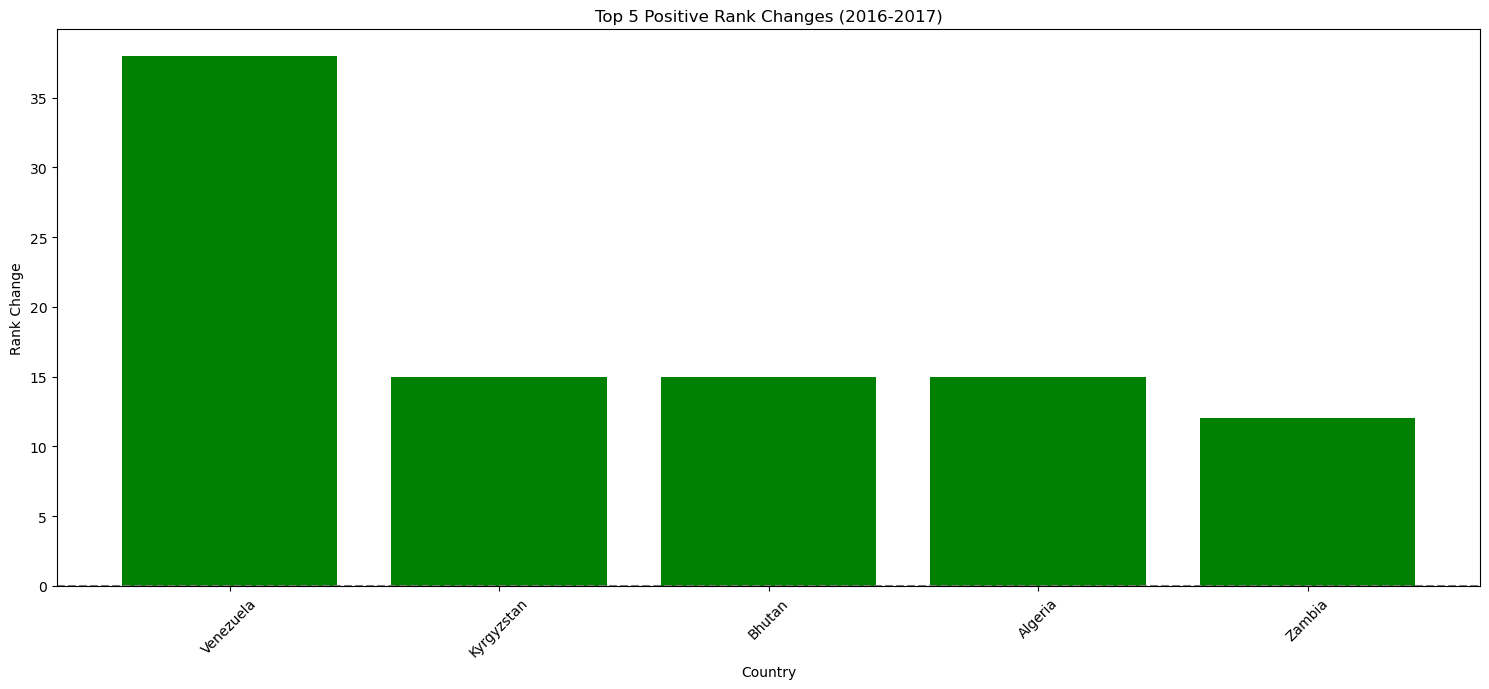

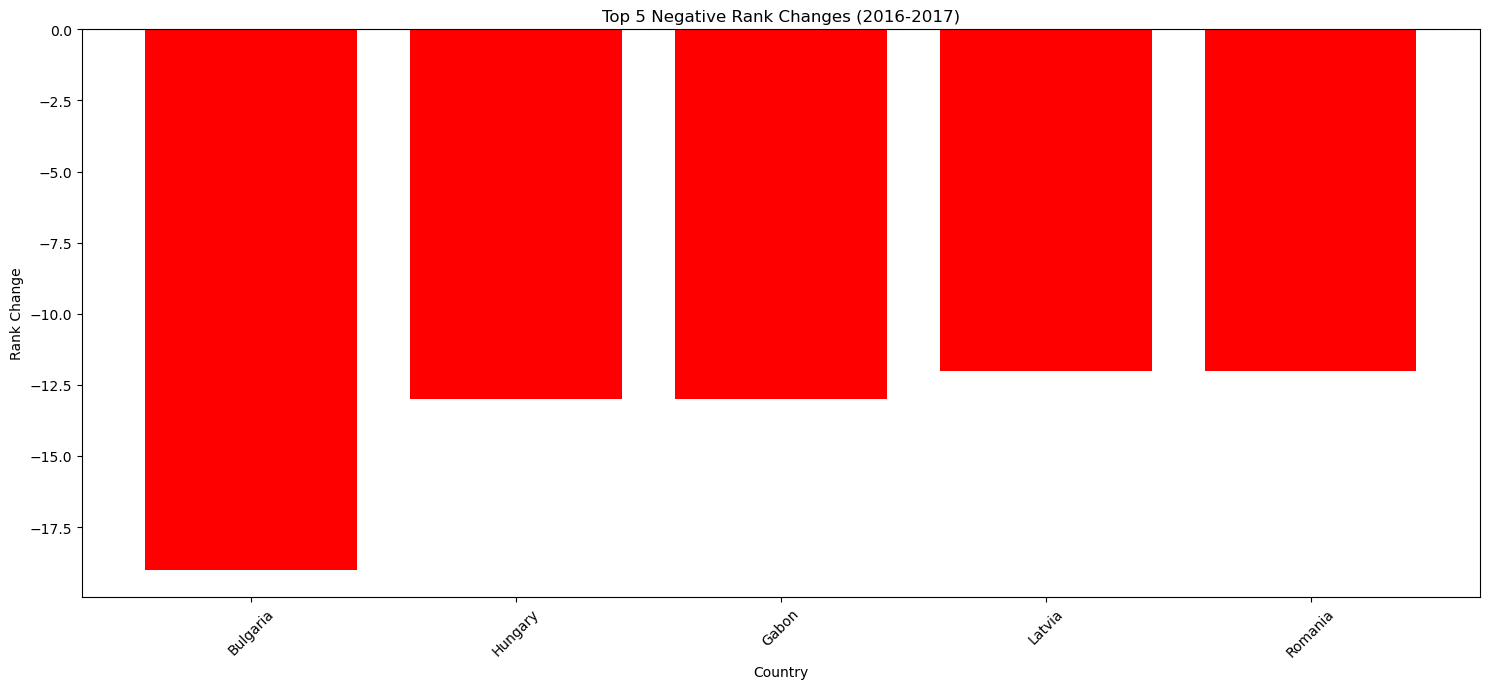

In [449]:
# Recalculate and sort rank changes for each year without using `abs`
# Filter positive and negative rank changes separately.

# Top 5 positive rank changes (improvement in rank)
positive_rank_change_2015_2016 = merged_2016_2017[merged_2016_2017['Rank Change 2015-2016'] > 0].sort_values(by='Rank Change 2015-2016', ascending=False).head(5)

# Top 5 negative rank changes (drop in rank)
negative_rank_change_2015_2016 = merged_2016_2017[merged_2016_2017['Rank Change 2015-2016'] < 0].sort_values(by='Rank Change 2015-2016').head(5)

# Chart 1: Top 5 positive rank changes (2015-2016)
plt.figure(figsize=(15, 7))
plt.bar(positive_rank_change_2015_2016['Country'], positive_rank_change_2015_2016['Rank Change 2015-2016'], color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Country')
plt.ylabel('Rank Change')
plt.title('Top 5 Positive Rank Changes (2015-2016)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart 2: Top 5 negative rank changes (2015-2016)
plt.figure(figsize=(15, 7))
plt.bar(negative_rank_change_2015_2016['Country'], negative_rank_change_2015_2016['Rank Change 2015-2016'], color='red')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Country')
plt.ylabel('Rank Change')
plt.title('Top 5 Negative Rank Changes (2015-2016)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 5 positive rank changes (improvement in rank) for 2016-2017
positive_rank_change_2016_2017 = merged_2016_2017[merged_2016_2017['Rank Change 2016-2017'] > 0].sort_values(by='Rank Change 2016-2017', ascending=False).head(5)

# Top 5 negative rank changes (drop in rank) for 2016-2017
negative_rank_change_2016_2017 = merged_2016_2017[merged_2016_2017['Rank Change 2016-2017'] < 0].sort_values(by='Rank Change 2016-2017').head(5)

# Chart 3: Top 5 positive rank changes (2016-2017)
plt.figure(figsize=(15, 7))
plt.bar(positive_rank_change_2016_2017['Country'], positive_rank_change_2016_2017['Rank Change 2016-2017'], color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Country')
plt.ylabel('Rank Change')
plt.title('Top 5 Positive Rank Changes (2016-2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart 4: Top 5 negative rank changes (2016-2017)
plt.figure(figsize=(15, 7))
plt.bar(negative_rank_change_2016_2017['Country'], negative_rank_change_2016_2017['Rank Change 2016-2017'], color='red')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Country')
plt.ylabel('Rank Change')
plt.title('Top 5 Negative Rank Changes (2016-2017)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




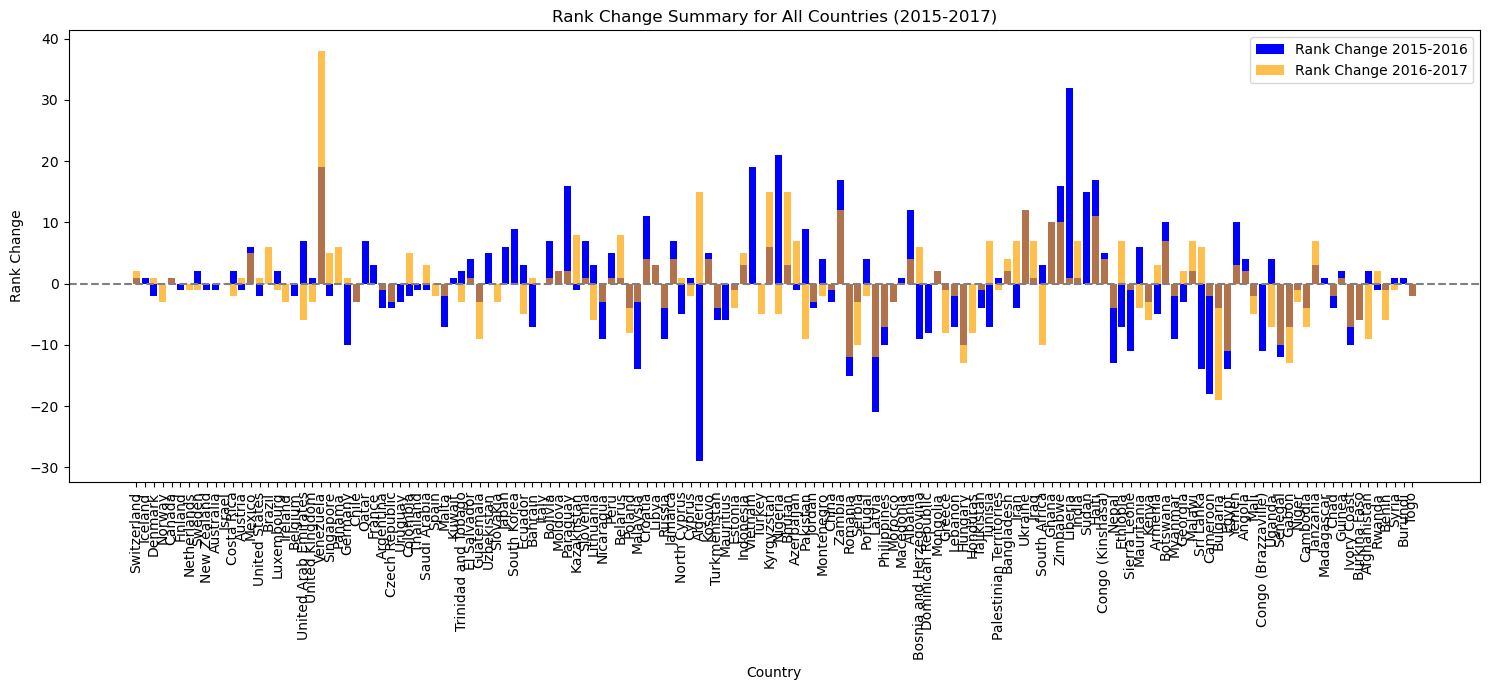

In [450]:


# Ensure relevant columns are present and rename for consistency
data_2015 = Happyness_2015[['Country', 'Happiness Score']].rename(columns={'Happiness Score': 'Happiness Score 2015'})
data_2016 = Happyness_2016[['Country', 'Happiness Score']].rename(columns={'Happiness Score': 'Happiness Score 2016'})
data_2017 = Happyness_2017[['Country', 'Happiness Score']].rename(columns={'Happiness Score': 'Happiness Score 2017'})

# Merge dataframes on 'Country'
merged_2015_2016 = pd.merge(data_2015, data_2016, on='Country', how='inner')
merged_2016_2017 = pd.merge(merged_2015_2016, data_2017, on='Country', how='inner')

# Calculate rank columns for each year
merged_2016_2017['Rank 2015'] = merged_2016_2017['Happiness Score 2015'].rank(ascending=False).astype(int)
merged_2016_2017['Rank 2016'] = merged_2016_2017['Happiness Score 2016'].rank(ascending=False).astype(int)
merged_2016_2017['Rank 2017'] = merged_2016_2017['Happiness Score 2017'].rank(ascending=False).astype(int)

# Calculate rank changes between the years
merged_2016_2017['Rank Change 2015-2016'] = merged_2016_2017['Rank 2016'] - merged_2016_2017['Rank 2015']
merged_2016_2017['Rank Change 2016-2017'] = merged_2016_2017['Rank 2017'] - merged_2016_2017['Rank 2016']

# Plot combined rank change summary for all countries (2015-2017)
plt.figure(figsize=(15, 7))
plt.bar(merged_2016_2017['Country'], merged_2016_2017['Rank Change 2015-2016'], color='blue', label='Rank Change 2015-2016')
plt.bar(merged_2016_2017['Country'], merged_2016_2017['Rank Change 2016-2017'], color='orange', label='Rank Change 2016-2017', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Country')
plt.ylabel('Rank Change')
plt.title('Rank Change Summary for All Countries (2015-2017)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()



# Q3

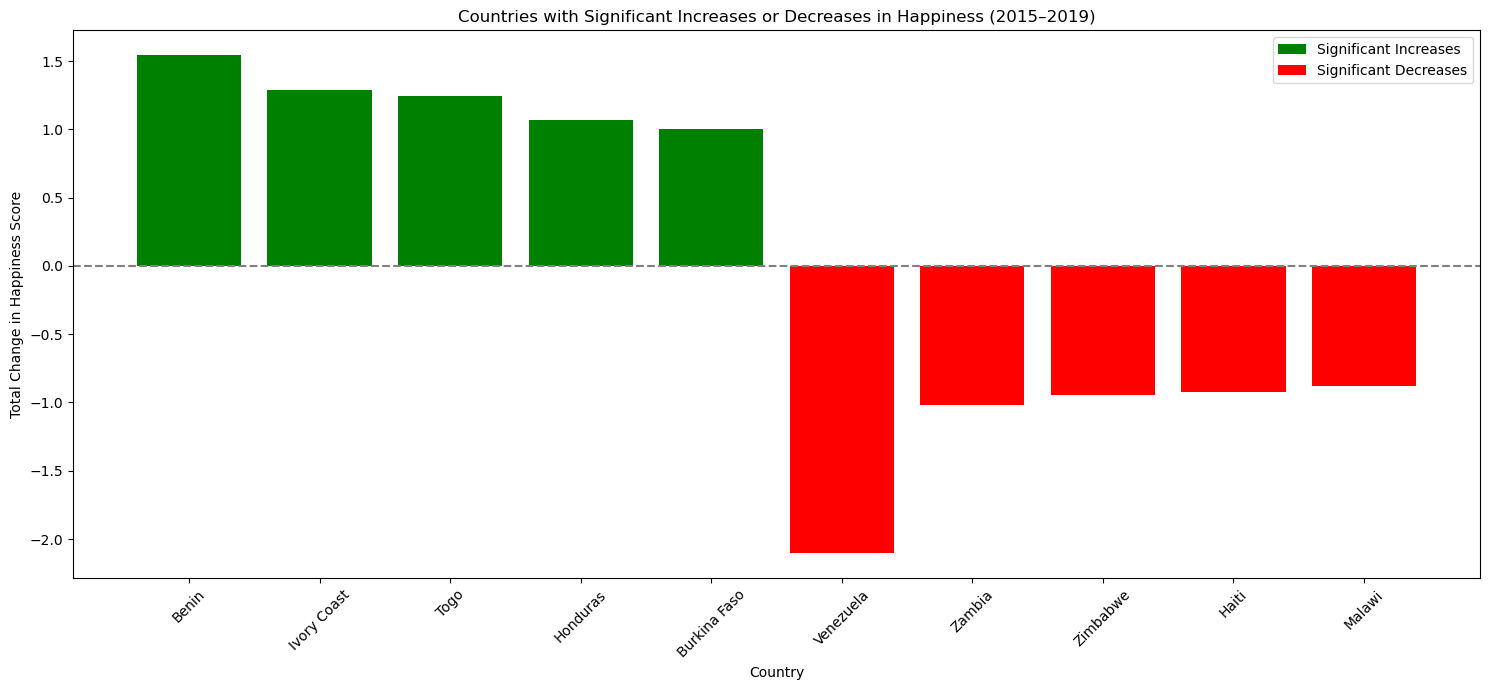

In [451]:
# Ensure relevant columns are present and rename for consistency
data_2015 = Happyness_2015[['Country', 'Happiness Score']].rename(columns={'Happiness Score': 'Happiness Score 2015'})
data_2016 = Happyness_2016[['Country', 'Happiness Score']].rename(columns={'Happiness Score': 'Happiness Score 2016'})
data_2017 = Happyness_2017[['Country', 'Happiness Score']].rename(columns={'Happiness Score': 'Happiness Score 2017'})
data_2018 = Happyness_2018[['Country', 'Happiness Score']].rename(columns={'Happiness Score': 'Happiness Score 2018'})
data_2019 = Happyness_2019[['Country', 'Happiness Score']].rename(columns={'Happiness Score': 'Happiness Score 2019'})

# Merge all five years of data on 'Country'
merged_all_years = data_2015.merge(data_2016, on='Country', how='inner')\
                            .merge(data_2017, on='Country', how='inner')\
                            .merge(data_2018, on='Country', how='inner')\
                            .merge(data_2019, on='Country', how='inner')

# Calculate the total change in happiness score from 2015 to 2019
merged_all_years['Total Change 2015-2019'] = merged_all_years['Happiness Score 2019'] - merged_all_years['Happiness Score 2015']

# Sort and find the top 5 increases and top 5 decreases
top_5_increases = merged_all_years.sort_values(by='Total Change 2015-2019', ascending=False).head(5)
top_5_decreases = merged_all_years.sort_values(by='Total Change 2015-2019', ascending=True).head(5)

# Plot the top movers
plt.figure(figsize=(15, 7))

# Plot top 5 increases
plt.bar(top_5_increases['Country'], top_5_increases['Total Change 2015-2019'], color='green', label='Significant Increases')

# Plot top 5 decreases
plt.bar(top_5_decreases['Country'], top_5_decreases['Total Change 2015-2019'], color='red', label='Significant Decreases')

plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Country')
plt.ylabel('Total Change in Happiness Score')
plt.title('Countries with Significant Increases or Decreases in Happiness (2015–2019)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()




# Q4: Which countries had the most stable happiness scores between 2015 and 2019?

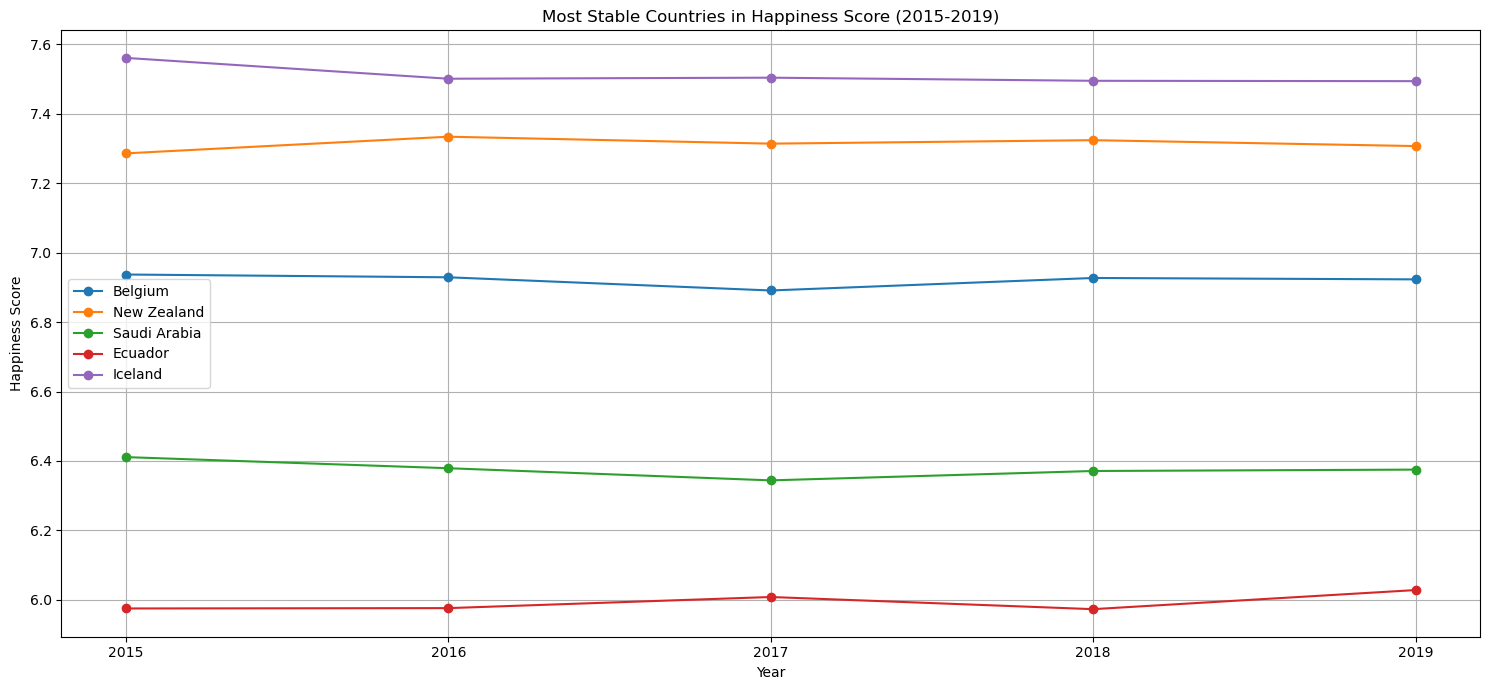

In [452]:
# Merge all dataframes
merged_all_years = data_2015.merge(data_2016, on='Country', how='inner')\
                            .merge(data_2017, on='Country', how='inner')\
                            .merge(data_2018, on='Country', how='inner')\
                            .merge(data_2019, on='Country', how='inner')

# Calculate the standard deviation of happiness scores for each country to find the most stable countries
merged_all_years['Score Std Dev'] = merged_all_years[['Happiness Score 2015', 'Happiness Score 2016', 'Happiness Score 2017',
                                                      'Happiness Score 2018', 'Happiness Score 2019']].std(axis=1)

# Get the 5 most stable countries (lowest standard deviation)
most_stable_countries = merged_all_years.sort_values(by='Score Std Dev').head(5)

# Plot the happiness scores for the most stable countries over time
plt.figure(figsize=(15, 7))
for _, row in most_stable_countries.iterrows():
    plt.plot(['2015', '2016', '2017', '2018', '2019'], 
             [row['Happiness Score 2015'], row['Happiness Score 2016'], row['Happiness Score 2017'], 
              row['Happiness Score 2018'], row['Happiness Score 2019']], marker='o', label=row['Country'])

plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Most Stable Countries in Happiness Score (2015-2019)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
